# OVERVIEW

**Research Question**

_Can we predict which three zip codes provide the best investment opportunity for the Syracuse Real Estate Investment Trust (SREIT)?_

<br>

**Summary Tables**

Arkansas

| Location| Growth Calculation | Forecast % Inc. Price | Forecast 2018 Price| RMSE |  Technique | Data |
| --- | --- | --- | --- | --- | --- | --- |
| Hot Springs | 2017-2018 | 1.4% | \$133,816 | $5285 | ARIMA | Zillow 1997-2017 Monthly |
| Fayetteville | 2017-2018 | 2.5% | \$172,517 | \$7132 | ARIMA | Zillow 1997-2017 Monthly |
| Little Rock | 2017-2018 | 3.8% | \$145,683 | \$5633 | ARMIA | Zillow 1997-2017 Monthly |
| Searcy | 2017-2018 | 3.2% | \$95,435 | \$8018 | Prophet | Zillow 1997-2017 Monthly
<br>
_Please see Section 1.2 for the Arkansas visualizations._ 

USA

| Location| Growth Calculation | Recommended Zip Codes | Forecast % inc. Price | Forecast % inc. GDP | RMSE % (rmse/actual) | Technique | Data |
| --- | --- | --- | --- | --- | --- | --- | --- |
| USA | 2017-2018 | 08401,08232, 08241| 39-75% |  3.7-6.7% | 26-63% | Prophet | Zillow 1997-2017 Annual, GDP 2001-2007 Annual
| USA | 1997-2018 | 90403, 90027, 90020 | 483-556% | 93-147% | 11-13% | Prophet | Zillow 1997-2017 Annual, GDP 2001-2017 Annual |
<br>
_please see Section 1.7 for the Arkansas visualizations._ 

**Approach** 

 * What technique/algorithm/decision process used?
  * After importing and processing the Zillow data, it contained 3.3 million observations.  It was estimated that a time series models with monthly data would require over 50 hours of processing for 12,652 zip codes.  The decision was made to group the data by years to reduce the processing time and a model could be run using Facebook's Prophet in about 4 hours for all 12,652 zip codes.
  * Another design decision around the time frame for the forecasts.  The research question did not state whether the REIT was interested in a short term of long term view.  For this reason, the models were built with a short term using a 1 year growth from 2017 to the forecast for 2018 and a long term view from 1997 to the forecasted 2018 housing prices.

**Conclusion**
 * What three zip codes provide the best investment opportunity for the SREIT?
  * The long term forecast using Zillow data identified 4 of the top 5 zip codes for % growth from 1997 to forecast 2018 in California (with one in New York).  After using GDP data on the top Zillow zip codes, it was determined that 90403 (Santa Monica) and 90027/90020 (Los Angeles) provided the best long term potential.
  * The short term forecast using Zillow data provided more surprising and interesting results.  Looking at the increase from 2017 to projected 2018, identified cities in the northeast that were impacted by Hurricane Sandy in 2012.  The top zip codes short term were 08401/08232 (Atlantic City) and 08241 (Galloway, NJ).  Since this area was devastated by the 2012 storm, it is expected that the area will rebound in 2018.  This rebuilding was also highlighted in the 2017 New York Times article, "Not Your Mother's Jersey Shore".
  * The RMSE percent error (RMSE/Actual) for the top zip codes ranged from 26-63% for the short term forecast and 11-13% for the long range forecast.  This variation is expected and the AtsPy provides a better prediction on the top zip codes where multiple techniques are evaluated (see Section 2.2.2 for details)
  * Please see the table above and Section 3.0 for more details on the interpretation of the models.

 * Bonus: Develop a geographic visualization that in your view best depicts the data and recommendations by state

**Data**

 * Zillow housing data from 1997-2018 (files.zillowstatic.com/research/public/Zip/Zip_Zhvi_SingleFamilyResidence.csv).
 * Gross Domestic Product (GDP) data 2001-2018 is from the Bureau of Labor Statistics.

**Technology**

* Facebook's Prophet was utilized for the high volume series modeling
* AtsPy (Automated Time Series Forecasting for Python) was used for the metro areas of Arkansas and for more detailed analysis of the top zip codes using ARIMA, Prophet and Gluonts techniques.  More information on AtsPy can be found at https://github.com/firmai/atspy.

# 1.0 - OBTAIN - SCRUB - EXPLORE

# 1.1 - Arkansas Data - Obtain and Scrub

In [1]:
from google.colab import drive
#drive.mount('/content/drive')
drive.mount("/content/drive", force_remount=True)

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [2]:
# import packages for analysis and modeling
import pandas as pd  # data frame operations
import numpy as np  # arrays and math functions
from scipy.stats import uniform  # for training-and-test split
import statsmodels.api as sm  # statistical models (including regression)
import statsmodels.formula.api as smf  # R-like model specification
import matplotlib.pyplot as plt  # 2D plotting
import seaborn as sns  # PROVIDES TRELLIS AND SMALL MULTIPLE PLOTTING
from pandas import Series
from pandas import read_csv
from statsmodels.tsa.arima_model import ARIMA
from statsmodels.tsa.arima_model import ARIMAResults
from sklearn.metrics import r2_score # Import a scoring metric to compare methods
from sklearn.metrics import mean_squared_error
from math import sqrt
from fbprophet import Prophet
import datetime
from fbprophet.diagnostics import performance_metrics
from fbprophet.diagnostics import cross_validation
import csv
import io

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [0]:
#Load the data from Zillow
url= "https://files.zillowstatic.com/research/public/Zip/Zip_Zhvi_SingleFamilyResidence.csv"
zillow = pd.read_csv(url)

In [0]:
zillowAR = zillow.query('Metro in ["Hot Springs", "Little Rock-North Little Rock-Conway", "Fayetteville-Springdale-Rogers", "Searcy"]')

In [0]:
# Drop 1996 columns
zillowAR = zillowAR.drop(['RegionType','StateName','1996-01-31','1996-02-29','1996-03-31','1996-04-30','1996-05-31','1996-06-30','1996-07-31','1996-08-31','1996-09-30','1996-10-31','1996-11-30','1996-12-31'], axis=1)

In [0]:
## INSERT NAN IN PLACE OF BLANKS AND SEE TUTORIAL BELOW FOR OPTIONS WITH NAN

#zillowARnan = zillowAR.replace('', np.nan, inplace=True)

#Confirm this code works correctly
#zillowARnan = (zillowAR.replace(r'^\s*$', np.nan, regex=True))

# Dropna deletes 32 of 136 rows
# Determine if a better appraoch is to remove some dates 
#zillowAR = zillowAR.dropna()

In [0]:
#Use melt to add date columns to rows
zillowARtrans = zillowAR.melt(id_vars=["RegionID", "SizeRank","RegionName","State","City","Metro","CountyName"], 
        var_name="Date", 
        value_name="Value")

In [0]:
zillowARtrans['Date'] = pd.to_datetime(zillowARtrans['Date'], format='%Y-%m-%d')
#zillowARtrans['YM'] = zillowARtrans.loc[zillowARtrans['Year','Month']]

zillowARtrans['YM'] = pd.to_datetime(zillowARtrans.Date).dt.to_period('m')

In [9]:
# Check shape
zillowARtrans.shape

(37944, 10)

In [10]:
print (zillowARtrans.isnull().sum())

RegionID         0
SizeRank         0
RegionName       0
State            0
City             0
Metro            0
CountyName       0
Date             0
Value         4900
YM               0
dtype: int64


In [0]:
# The RegionName is the zip code but is missing zeros, change to 5 digits
zillowARtrans['RegionName'] = zillowARtrans['RegionName'].astype('str').apply(lambda x: x.zfill(5))

In [0]:
#Put Values into buckets before running crosstab
#pd.crosstab(index=zillowARtrans['Metro'],columns=zillowARtrans['Value'])

In [13]:
zillowARtrans.Metro.value_counts()

Little Rock-North Little Rock-Conway    17298
Fayetteville-Springdale-Rogers          13671
Searcy                                   5022
Hot Springs                              1953
Name: Metro, dtype: int64

In [14]:
zillowARtrans.CountyName.value_counts()

Pulaski County       6696
White County         5022
Benton County        4743
Washington County    4464
Lonoke County        3069
Saline County        2790
Faulkner County      2790
McDonald County      2511
Garland County       1953
Madison County       1953
Perry County         1116
Grant County          837
Name: CountyName, dtype: int64

In [15]:
zillowARtrans.dtypes

RegionID               int64
SizeRank               int64
RegionName            object
State                 object
City                  object
Metro                 object
CountyName            object
Date          datetime64[ns]
Value                float64
YM                 period[M]
dtype: object

In [16]:
zillowARtrans.index = zillowARtrans['Date']
zillowARtrans

,RegionID,SizeRank,RegionName,State,City,Metro,CountyName,Date,Value,YM
Date,,,,,,,,,,
1997-01-31,89249,332,71913,AR,Hot Springs,Hot Springs,Garland County,1997-01-31,90258.0,1997-01
1997-01-31,89319,664,72034,AR,Conway,Little Rock-North Little Rock-Conway,Faulkner County,1997-01-31,103502.0,1997-01
1997-01-31,89707,870,72701,AR,Fayetteville,Fayetteville-Springdale-Rogers,Washington County,1997-01-31,96387.0,1997-01
1997-01-31,89749,916,72764,AR,Springdale,Fayetteville-Springdale-Rogers,Washington County,1997-01-31,93065.0,1997-01
1997-01-31,89745,1592,72758,AR,Rogers,Fayetteville-Springdale-Rogers,Benton County,1997-01-31,139311.0,1997-01
...,...,...,...,...,...,...,...,...,...,...
2020-03-31,89420,32332,72165,AR,Bradford,Searcy,White County,2020-03-31,61563.0,2020-03
2020-03-31,89739,32559,72749,AR,Morrow,Fayetteville-Springdale-Rogers,Washington County,2020-03-31,139836.0,2020-03
2020-03-31,89346,33411,72066,AR,Carlisle,Little Rock-North Little Rock-Conway,Lonoke County,2020-03-31,144633.0,2020-03


In [0]:
# Add month and year columns
# zillowARtrans['Year'] = zillowARtrans.index.year
# zillowARtrans['Month'] = zillowARtrans.index.month
# zillowARtrans

In [0]:
#Impute missing Values
#dfImpute = zillowARtrans.assign(InterpolateTime=zillowARtrans.Value.interpolate(method='time'))
#dfImpute[dfImpute['Value'].isnull()]

In [0]:
#Data for 1997 to 2017
zillowARtrans97to17 = zillowARtrans.loc['1997-01-31':'2017-12-31']

In [0]:
# Convert dataframe to series format
zillowARseries = pd.Series(zillowARtrans['Value'], index=zillowARtrans.index)

# 1.2 - Arkansas Explore

In [0]:
# Use seaborn style defaults and set the default figure size
#sns.set(rc={'figure.figsize':(11, 4)})

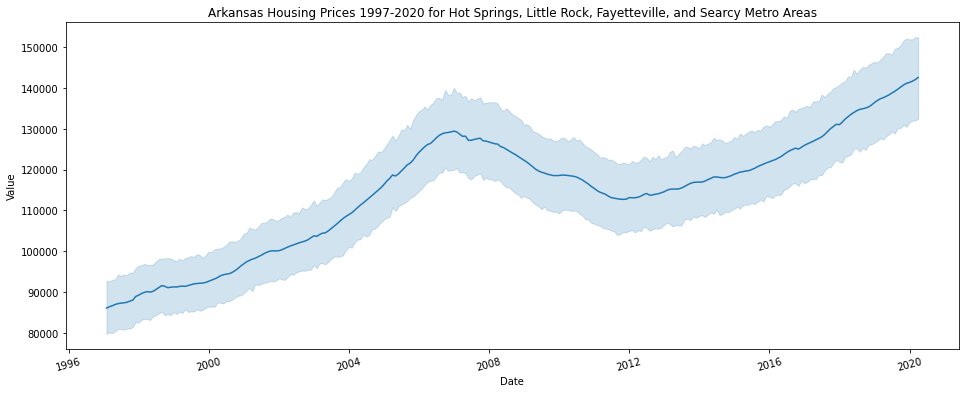

In [22]:
#Use this plot, figure out why year isn't working
plt.figure(figsize=(16, 6))
plt.clf()
sns.lineplot(x="Date", y="Value", data=zillowARtrans)
plt.xticks(rotation=15)
plt.title('Arkansas Housing Prices 1997-2020 for Hot Springs, Little Rock, Fayetteville, and Searcy Metro Areas')
plt.show()

/usr/local/lib/python3.6/dist-packages/numpy/lib/histograms.py:839: RuntimeWarning:

invalid value encountered in greater_equal

/usr/local/lib/python3.6/dist-packages/numpy/lib/histograms.py:840: RuntimeWarning:

invalid value encountered in less_equal



(array([2194., 7454., 8913., 6982., 4344., 1720.,  528.,  549.,  175.,
         185.]),
 array([ 21450. ,  53192.1,  84934.2, 116676.3, 148418.4, 180160.5,
        211902.6, 243644.7, 275386.8, 307128.9, 338871. ]),
 <a list of 10 Patch objects>)

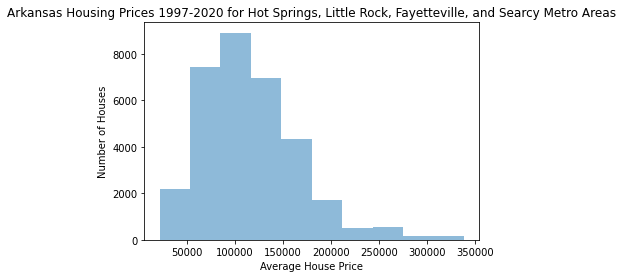

In [23]:
plt.title('Arkansas Housing Prices 1997-2020 for Hot Springs, Little Rock, Fayetteville, and Searcy Metro Areas')
#plt.figure(figsize=(16, 6))
plt.xlabel('Average House Price')
plt.ylabel('Number of Houses')
plt.hist(zillowARtrans['Value'], alpha=0.5)

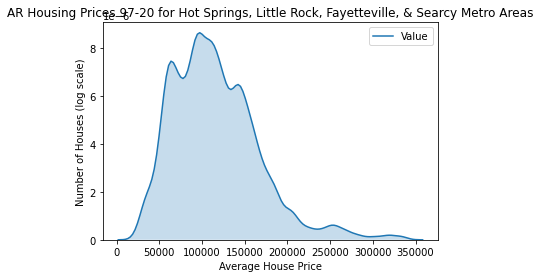

In [24]:
plt.title('AR Housing Prices 97-20 for Hot Springs, Little Rock, Fayetteville, & Searcy Metro Areas')
#plt.figure(figsize=(20,1))
plt.xlabel('Average House Price')
plt.ylabel('Number of Houses (log scale)')
sns.kdeplot(zillowARtrans['Value'], shade=True)

In [0]:
# Plot 1996 to 2020 Values
#zillowARtrans['Value'].plot(linewidth=0.5);

#Source: https://www.dataquest.io/blog/tutorial-time-series-analysis-with-pandas/

[Text(0, 0, 'Hot\nSprings'),
 Text(0, 0, 'Little\nRock-North\nLittle\nRock-\nConway'),
 Text(0, 0, 'Fayettevil\nle-Springd\nale-Rogers'),
 Text(0, 0, 'Searcy')]

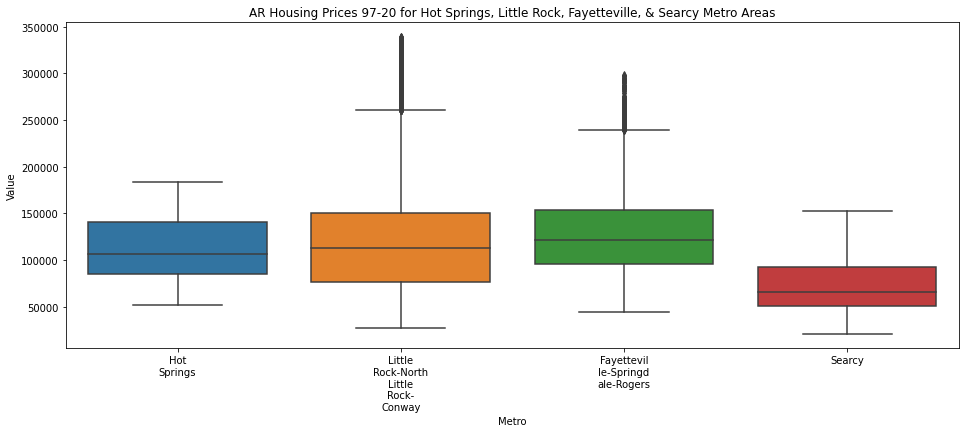

In [26]:
import textwrap
plt.figure(figsize=(16, 6))
plt.title('AR Housing Prices 97-20 for Hot Springs, Little Rock, Fayetteville, & Searcy Metro Areas')
ax = sns.boxplot(data=zillowARtrans, x='Metro', y='Value');
ax.set_xticklabels([textwrap.fill(t.get_text(), 10)  for t in ax.get_xticklabels()])

In [0]:
# Use this plot, why is year not working
# import seaborn as sns
# plt.figure(figsize=(16, 6))
# sns.set(style="darkgrid")

# # Load an example dataset with long-form data
# #fmri = sns.load_dataset("zillowARtrans")

# # Plot the responses for different events and regions
# sns.lineplot(x="Year", y="Value",
#              hue="Metro",
#              data=zillowARtrans)

In [0]:
# Need to remove missing values for this to run
# from pylab import rcParams

# res = sm.tsa.seasonal_decompose(zillowARtrans.Value,
#                                 freq=12,
#                                 model='additive')
# resplot = res.plot()
# resplot.savefig('Seasonal_Decompose.png', dpi=150)

In [0]:
# Changing index to monthly due to ARIMA error message
#zillowARtrans.index = pd.DatetimeIndex(zillowARtrans.index).to_period('M')

In [0]:
# START PLOTS FROM DEPTONETIMESERIES

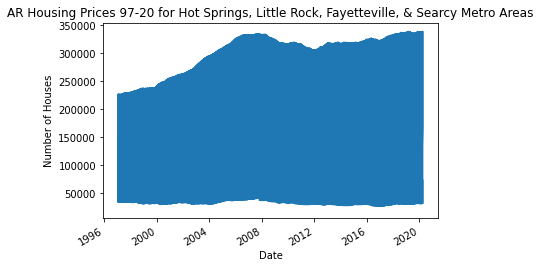

In [31]:
from matplotlib import pyplot
zillowARseries.plot()
plt.title('AR Housing Prices 97-20 for Hot Springs, Little Rock, Fayetteville, & Searcy Metro Areas')
plt.ylabel('Number of Houses')
pyplot.show()

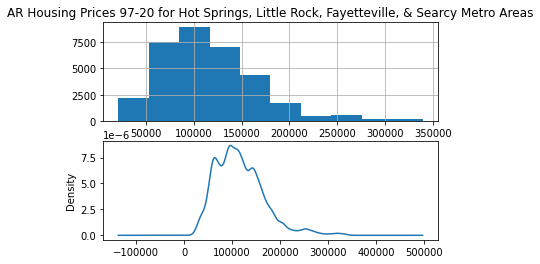

In [32]:
pyplot.figure(1)
pyplot.subplot(211)
zillowARseries.hist()
plt.title('AR Housing Prices 97-20 for Hot Springs, Little Rock, Fayetteville, & Searcy Metro Areas')
pyplot.subplot(212)
zillowARseries.plot(kind='kde')

# 1.3 - GDP Data - Obtain and Scrub

Sources: 

https://data.world/nrippner/fips-to-zip-code-crosswalk

Real GDP (thousands of chained 2012 dollars) 2001_2018 
https://apps.bea.gov/regional/Downloadzip.cfm

In [33]:
#Load the data from data.world crosswalk for country to zip code conversion
#path= "/content/drive/My Drive/Colab Notebooks/IST718/Lab2/ZIP-COUNTY-FIPS_2017-06.csv"
crosswalk = pd.read_csv('/content/drive/My Drive/Colab Notebooks/IST718/Lab2/ZIP-COUNTY-FIPS_2017-06.csv',engine='python')
#crosswalk = pd.read_csv('/content/ZIP-COUNTY-FIPS_2017-06.csv',engine='python')
crosswalk = crosswalk.rename(columns = {'STCOUNTYFP':'GeoFIPS'})
crosswalk = crosswalk[~crosswalk['STATE'].isin(['PR','VI','GU'])]
crosswalk['ZIP'] = crosswalk['ZIP'].astype('str').apply(lambda x: x.zfill(5))
crosswalk

,ZIP,COUNTYNAME,STATE,GeoFIPS,CLASSFP
0,36003,Autauga County,AL,1001,H1
1,36006,Autauga County,AL,1001,H1
2,36067,Autauga County,AL,1001,H1
3,36066,Autauga County,AL,1001,H1
4,36703,Autauga County,AL,1001,H1
...,...,...,...,...,...
52566,82729,Weston County,WY,56045,H1
52567,82730,Weston County,WY,56045,H1
52568,82701,Weston County,WY,56045,H1
52569,82723,Weston County,WY,56045,H1


In [34]:
#Check to insure Puerto Rico, Virgin Islands and Guam were removed from data
crosswalk.STATE.unique()

array(['AL', 'AK', 'AZ', 'AR', 'CA', 'CO', 'CT', 'DE', 'DC', 'FL', 'GA',
       'HI', 'ID', 'IL', 'IN', 'IA', 'KS', 'KY', 'LA', 'ME', 'MD', 'MA',
       'MI', 'MN', 'MS', 'MO', 'MT', 'NE', 'NV', 'NH', 'NJ', 'NM', 'NY',
       'NC', 'ND', 'OH', 'OK', 'OR', 'PA', 'RI', 'SC', 'SD', 'TN', 'TX',
       'UT', 'VT', 'VA', 'WA', 'WV', 'WI', 'WY'], dtype=object)

In [0]:
#Load the data from bea.gov on GDP data from 2001-2018
path= "/content/drive/My Drive/Colab Notebooks/IST718/Lab2/RealGDP.csv"
#path = '/content/RealGDP.csv'
gdp = pd.read_csv(path, encoding = "ISO-8859-1")

In [36]:
GDPmerged = pd.merge(gdp, crosswalk, on='GeoFIPS', how="left")
GDPmerged = GDPmerged.dropna()
GDPmerged.drop_duplicates(subset ="ZIP", keep = False, inplace = True) 
GDPmerged

,GeoFIPS,GeoName,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,ZIP,COUNTYNAME,STATE,CLASSFP
0,1001,"Autauga, AL",954588,975940,986203,1129055,1125576,1210687,1234500,1112891,1144614,1207789,1317638,1482770,1411910,1406262,1518409,1526310,1422078,1483414,36003,Autauga County,AL,H1
8,1001,"Autauga, AL",954588,975940,986203,1129055,1125576,1210687,1234500,1112891,1144614,1207789,1317638,1482770,1411910,1406262,1518409,1526310,1422078,1483414,36068,Autauga County,AL,H1
9,1001,"Autauga, AL",954588,975940,986203,1129055,1125576,1210687,1234500,1112891,1144614,1207789,1317638,1482770,1411910,1406262,1518409,1526310,1422078,1483414,36008,Autauga County,AL,H1
13,1003,"Baldwin, AL",3929753,4154915,4352352,4772559,5257742,5296563,5283689,4997036,4693291,4843331,4887545,5016735,5136425,5178584,5345363,5496105,5525882,5774289,36550,Baldwin County,AL,H1
14,1003,"Baldwin, AL",3929753,4154915,4352352,4772559,5257742,5296563,5283689,4997036,4693291,4843331,4887545,5016735,5136425,5178584,5345363,5496105,5525882,5774289,36551,Baldwin County,AL,H1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
52067,56041,"Uinta, WY",985399,1083310,1044571,1051394,1077490,1195739,1236378,1272157,1230053,1161169,1030215,1000364,977038,965590,981530,938876,904458,906587,82930,Uinta County,WY,H1
52068,56041,"Uinta, WY",985399,1083310,1044571,1051394,1077490,1195739,1236378,1272157,1230053,1161169,1030215,1000364,977038,965590,981530,938876,904458,906587,82937,Uinta County,WY,H1
52069,56041,"Uinta, WY",985399,1083310,1044571,1051394,1077490,1195739,1236378,1272157,1230053,1161169,1030215,1000364,977038,965590,981530,938876,904458,906587,82939,Uinta County,WY,H1
52075,56045,"Weston, WY",276760,269065,279162,288681,316109,358362,445903,491756,333331,312104,290199,322557,290116,314979,387259,321664,306033,315885,82723,Weston County,WY,H1


In [0]:
#Use melt to add date columns to rows
GDPtrans = GDPmerged.melt(id_vars=["GeoFIPS", "GeoName", "ZIP","COUNTYNAME","STATE","CLASSFP"],var_name="Date") 
#GDPtrans = GDPmerged.melt(id_vars=["GeoFIPS", "GeoName", "ZIP","COUNTYNAME","STATE"],var_name="Date") 
        #value_name="Value")
#GDPtrans.drop_duplicates(subset ="ZIP", keep = False, inplace = True)         

In [0]:
# Create dataset grouped by zip and year for target zip codes

GDP_Prophet = GDPtrans[GDPtrans['ZIP'].isin(['08401','08232','60475','08241','19013','90403','91108','90020','11216','90027'])]
GDP_Prophet = GDP_Prophet.drop(['CLASSFP'], axis=1)
GDP_Prophet = GDP_Prophet.groupby(["Date","ZIP","value"],as_index=False).mean()
GDP_Prophet.index = pd.to_datetime(GDP_Prophet['Date'], format='%Y')
GDP_Prophet['Date'] = GDP_Prophet.index
GDP_Prophet = GDP_Prophet.rename(index=str, columns={"Date":"ds","value":"y"})
GDP_Prophet = GDP_Prophet[["ds","y","ZIP"]]
GDP_Prophet = GDP_Prophet.replace('NA', np.nan, inplace=False)
GDP_Prophet = GDP_Prophet.replace('(NA)', np.nan, inplace=False)
GDP_Prophet = GDP_Prophet.dropna()
GDP_Prophet = GDP_Prophet.reset_index(drop=True)
GDP_Prophet = GDP_Prophet.rename(columns={'ds':'ds', 'y':'y'})

# 1.4 - USA Data - Obtain and Scrub

In [0]:
#Copy Zillow data to new DF
zillowUSA = zillow

In [40]:
#Drop 1996 column
zillowUSA = zillowUSA.drop(['RegionType','1996-01-31','1996-02-29','1996-03-31','1996-04-30','1996-05-31','1996-06-30','1996-07-31','1996-08-31','1996-09-30','1996-10-31','1996-11-30','1996-12-31'], axis=1)
zillowUSA.shape

(30464, 287)

In [41]:
# Drop blanks - if time permits, research adding values
zillowUSA = zillowUSA.dropna()
#zillowUSA.columns = zillowUSA.columns.str.replace(' ', '')
zillowUSA.shape
#zillowUSA

(12652, 287)

In [0]:
#Use melt to add date columns to rows
zillowUSAtrans = zillowUSA.melt(id_vars=["RegionID", "StateName","SizeRank","RegionName","State","City","Metro","CountyName"], 
        var_name="Date", 
        value_name="Value")

In [0]:
zillowUSAtrans['Date'] = pd.to_datetime(zillowUSAtrans['Date'], format='%Y-%m-%d')
#zillowARtrans['YM'] = pd.to_datetime(zillowARtrans.Date).dt.to_period('m')

In [0]:
# The RegionName is the zip code but is missing zeros, change to 5 digits
zillowUSAtrans['RegionName'] = zillowUSAtrans['RegionName'].astype('str').apply(lambda x: x.zfill(5))
zillowUSAtrans.index = zillowUSAtrans['Date']

In [45]:
#zillowUSAtrans.RegionName.value_counts()
zillowUSAtrans['RegionName'].value_counts()

29943    279
73601    279
45245    279
26852    279
95126    279
        ... 
07014    279
07068    279
41094    279
55918    279
12494    279
Name: RegionName, Length: 12652, dtype: int64

In [46]:
zillowUSAtrans.dtypes

RegionID               int64
StateName             object
SizeRank               int64
RegionName            object
State                 object
City                  object
Metro                 object
CountyName            object
Date          datetime64[ns]
Value                float64
dtype: object

In [0]:
# Add month and year columns
zillowUSAtrans['Year'] = zillowUSAtrans.index.year
zillowUSAtrans['Month'] = zillowUSAtrans.index.month

In [0]:
#Data for 1997 to 2017
zillowUSA97to17 = zillowUSAtrans.loc['1997-01-31':'2017-12-31']

In [49]:
#Create a dataset that includes 2018 for the RMSE calculations
zillowUSA97to17['LogValue'] = np.log(zillowUSA97to17['Value'])
zillowUSA97to18 = zillowUSAtrans.loc['1997-01-31':'2018-12-31'].reset_index(drop=True)
zillowUSA97to18 = zillowUSA97to18.groupby(["State","Year"],as_index=False).mean()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [0]:
# Convert dataframe to series format for 1997-2017
#zillowUSAseries = pd.Series(zillowUSA97to17['Value'], index=zillowUSA97to17.index)

In [0]:
#Replaced by Prophet data below - validate before deleting this section
# import datetime
# zillowUSAyears = zillowUSA97to17
# zillowUSAyears = zillowUSAyears.reset_index(drop=True)
# zillowUSAyears = zillowUSA97to17.drop(['Month','LogValue','SizeRank','RegionID'], axis=1)
# zillowUSAyears = zillowUSAyears.groupby(["RegionName","Year"],as_index=False).mean()
# zillowUSAyears.index = pd.to_datetime(zillowUSAyears['Year'], format='%Y')
# zillowUSAyears['Date'] = zillowUSAyears.index
# zillowUSAyears = (zillowUSAyears[['Value','RegionName','Date']])
# zillowUSAyears

In [0]:
# Create zillowUSAyears Grouped by State/Year
USAyearsByState = zillowUSA97to17
USAyearsByState = USAyearsByState.reset_index(drop=True)
USAyearsByState = USAyearsByState.drop(['Month','LogValue','SizeRank','RegionID'], axis=1)
USAyearsByState = USAyearsByState.groupby(["State","Year"],as_index=False).mean()
USAyearsByState.index = pd.to_datetime(USAyearsByState['Year'], format='%Y') #changed from Y
#USAyearsByState.index = pd.to_datetime(USAyearsByState['Date'], format='%YS') #changed from Y
USAyearsByState['Date'] = USAyearsByState.index
#USAyearsByState['Year'] = USAyearsByState.index
#USAyearsByState = USAyearsByState.rename(index=str, columns={"Date":"ds","Value":"y"})
#USAyearsByState = USAyearsByState[["ds","y","State"]]

# 1.5 - Prophet Data- Obtain and Scrub

In [0]:
# Data for this section should be transferred from the Prophet notebook

In [0]:
# Copied from Prophet notebook to test next section - update later
# Create dataset grouped by state and year
zillowUSAyears = zillowUSA97to17
#zillowUSAyears = zillowUSA97to17.loc[zillowUSA97to17['State']=="WI"]
zillowUSAyears = zillowUSAyears.reset_index(drop=True)
zillowUSAyears = zillowUSAyears.drop(['Month','LogValue','SizeRank','RegionID'], axis=1)
zillowUSAyears = zillowUSAyears.groupby(["State","Year"],as_index=False).mean()
zillowUSAyears.index = pd.to_datetime(zillowUSAyears['Year'], format='%Y')
zillowUSAyears['Date'] = zillowUSAyears.index
zillowUSAyears = zillowUSAyears.rename(index=str, columns={"Date":"ds","Value":"y"})
zillowUSAyears = zillowUSAyears[["ds","y","State"]]

In [0]:
# Create dataset grouped by zip and year
zillowZipYears   = zillowUSA97to17
#zillowZipYears = zillowUSA97to17.loc[zillowUSA97to17['State']=="WI"]
zillowZipYears = zillowZipYears.reset_index(drop=True)
zillowZipYears = zillowZipYears.drop(['Month','LogValue','SizeRank','RegionID'], axis=1)
zillowZipYears = zillowZipYears.groupby(["RegionName","State","Year"],as_index=False).mean()
zillowZipYears.index = pd.to_datetime(zillowZipYears['Year'], format='%Y')
zillowZipYears['Date'] = zillowZipYears.index
zillowZipYears = zillowZipYears.rename(index=str, columns={"Date":"ds","Value":"y"})
zillowZipYears = zillowZipYears[["ds","y","RegionName"]]

In [0]:
# # Stopped here on 5/5/20 - need to determine date format for quarters
# # Create dataset grouped by zip and quarter
# zillowZipQuarter   = zillowUSA97to17
# #Insert if month 1 -3 Q1, 4-6 Q2, 7-9 Q3, 10-12 Q4
# zillowZipQuarter['quarter'] = zillowZipQuarter['Date'].dt.quarter
# #ZilowZipYears = zillowUSA97to17.loc[zillowUSA97to17['State']=="WI"]
# zillowZipQuarter = zillowZipQuarter.reset_index(drop=True)
# zillowZipQuarter = zillowZipQuarter.drop(['Month','LogValue','SizeRank','RegionID'], axis=1)
# zillowZipQuarter = zillowZipQuarter.groupby(["RegionName","State","quarter"],as_index=False).mean()
# zillowZipQuarter.index = pd.to_datetime(zillowZipQuarter['Year'], format='%Y#')
# #zillowZipQuarter['Date'] = zillowZipQuarter.index
# zillowZipQuarter = zillowZipQuarter.rename(index=str, columns={"Date":"ds","Value":"y"})
# zillowZipQuarter = zillowZipQuarter[["ds","y","RegionName"]]
# zillowZipQuarter

In [57]:
# Added to primary project on 4/30/20
#Data for 1997 to 2017 and 1997 to 2019
zillowUSA97to18zip = zillowUSAtrans.loc['1997-01-31':'2018-12-31'].reset_index(drop=True)
zillowUSA97to18zip = zillowUSA97to18zip.groupby(["RegionName","State","Year"],as_index=False).mean()
zillowUSA97to18zip

,RegionName,State,Year,RegionID,SizeRank,Value,Month
0,00715,TX,1997,58059.0,16188.0,52463.833333,6.5
1,00715,TX,1998,58059.0,16188.0,55858.666667,6.5
2,00715,TX,1999,58059.0,16188.0,57254.166667,6.5
3,00715,TX,2000,58059.0,16188.0,54936.083333,6.5
4,00715,TX,2001,58059.0,16188.0,57876.750000,6.5
...,...,...,...,...,...,...,...
278339,99587,AK,2014,100282.0,16455.0,372045.750000,6.5
278340,99587,AK,2015,100282.0,16455.0,380086.500000,6.5
278341,99587,AK,2016,100282.0,16455.0,392790.333333,6.5
278342,99587,AK,2017,100282.0,16455.0,395935.750000,6.5


In [58]:
zillowUSA97to17

,RegionID,StateName,SizeRank,RegionName,State,City,Metro,CountyName,Date,Value,Year,Month,LogValue
Date,,,,,,,,,,,,,
1997-01-31,84654,IL,1,60657,IL,Chicago,Chicago-Naperville-Elgin,Cook County,1997-01-31,376806.0,1997,1,12.839486
1997-01-31,91982,TX,3,77494,TX,Katy,Houston-The Woodlands-Sugar Land,Harris County,1997-01-31,201687.0,1997,1,12.214472
1997-01-31,84616,IL,4,60614,IL,Chicago,Chicago-Naperville-Elgin,Cook County,1997-01-31,566446.0,1997,1,13.247137
1997-01-31,91940,TX,5,77449,TX,Katy,Houston-The Woodlands-Sugar Land,Harris County,1997-01-31,97543.0,1997,1,11.488049
1997-01-31,91733,TX,7,77084,TX,Houston,Houston-The Woodlands-Sugar Land,Harris County,1997-01-31,96895.0,1997,1,11.481383
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2017-12-31,59316,ME,34430,04033,ME,Cumberland,Portland-South Portland,Cumberland County,2017-12-31,760112.0,2017,12,13.541221
2017-12-31,82132,MN,34430,55144,MN,North Saint Paul,Minneapolis-St. Paul-Bloomington,Ramsey County,2017-12-31,210118.0,2017,12,12.255425
2017-12-31,66881,MD,34430,21405,MD,Annapolis,Baltimore-Columbia-Towson,Anne Arundel County,2017-12-31,952546.0,2017,12,13.766894


# 1.6 - Prophet Output- Obtain and Scrub

## 1.6.1 - Zillow Data

In [61]:
#Import the CSV from Prophet Model (Forecast by Year for All Zip Codes)
Forecast17_21 = []
with open('/content/drive/My Drive/Colab Notebooks/IST718/Lab2/ProphetOutZip.csv', newline='') as csvfile:
  reader = csv.reader(csvfile, delimiter='a')#, quotechar='a')
  for row in reader:
    #print(', '.join(row))
    Forecast17_21.append(row)
Forecast17_21 = pd.DataFrame(Forecast17_21)
Forecast17_21 = Forecast17_21.rename(columns = {0:'year_idx',1:'zip',2:'state',3:'year_idx2',4:'yhat',5:'rmse',6:'year_float'}) 
Forecast17_21 = Forecast17_21.iloc[1:]
Forecast17_21 = Forecast17_21.drop(['state','year_idx2'], axis=1)

OSError: ignored

In [0]:
Forecast17_21

In [0]:
# StateAnnualProphet = pd.read_csv('/content/drive/My Drive/Colab Notebooks/IST718/Lab2/ProphetOut.csv')
# StateAnnualProphet = StateAnnualProphet.dropna()
# StateAnnualProphet

In [0]:
Forecast_18 = Forecast17_21.loc[Forecast17_21["year_idx"]=='18']
#Forecast_18=Forecast_18.rename(columns = {'state':'State'})
#StateAnnualProphet18 = pd.Index.delete(StateAnnualProphet18)
Forecast_18 = Forecast_18.reset_index()

In [0]:
zillowZipYears97 = zillowZipYears.loc[zillowZipYears["ds"]=='1997-01-01']

In [0]:
zillowZipYears17 = zillowZipYears.loc[zillowZipYears["ds"]=='2017-01-01']

In [0]:
df97_17 = pd.merge(zillowZipYears97, zillowZipYears17, on="RegionName")

In [0]:
# Merge two Dataframes on index of both the dataframes
mergedDF = pd.DataFrame(df97_17.merge(Forecast_18, left_index=True, right_index=True))
mergedDF = mergedDF.drop(['index'], axis=1)
mergedDF["yhat"] = mergedDF.yhat.astype(float)
mergedDF["rmse"] = mergedDF.rmse.astype(float)

In [0]:
# Calculate growth for top 5 zips from 97-18 and 17-18
USAgrowth = mergedDF
USAgrowth['Growth97_18'] = (mergedDF.yhat - mergedDF.y_x)/mergedDF.y_x
#USAgrowthLog = log((mergedDF.yhat - mergedDF.y_x)/mergedDF.y_x)
USAgrowth['Growth17_18'] = (mergedDF.yhat - mergedDF.y_y)/mergedDF.y_y
#USA17to18growthLog = log((mergedDF.yhat - mergedDF.y_y)/mergedDF.y_y
#USAgrowth = pd.DataFrame(USA97to17growth, USA17to18growth)

print(USAgrowth.nlargest(10, ['Growth97_18']))
Z_Top5_97_18 = (USAgrowth.nlargest(5, ['Growth97_18']))
print(USAgrowth.nlargest(10, ['Growth17_18']))
Z_Top5_17_18 = (USAgrowth.nlargest(5, ['Growth17_18']))

print(USAgrowth.nsmallest(5, ['Growth97_18']))
print(USAgrowth.nsmallest(5, ['Growth17_18']))

In [0]:
USAgrowth['rmse_yhat']=(USAgrowth.rmse)/(USAgrowth.y_y)
rmseMin = print(min(USAgrowth.rmse_yhat))
print(USAgrowth.nsmallest(5, ['rmse_yhat']))
print(USAgrowth.nlargest(5, ['rmse_yhat']))

In [0]:
print(USAgrowth.query('RegionName in ["90403","90027","90020","08401","08232","08241"]'))

In [0]:
USAgrowth

In [0]:
USAgrowth.dtypes

## 1.6.2 - GDP Data

In [0]:
#Import the CSV from Prophet Model (GDP)
ForecastGDP = []
with open('/content/drive/My Drive/Colab Notebooks/IST718/Lab2/ProphetOutGDP.csv', newline='') as csvfile:
  reader = csv.reader(csvfile, delimiter='a')#, quotechar='a')
  for row in reader:
    #print(', '.join(row))
    ForecastGDP.append(row)
ForecastGDP = pd.DataFrame(ForecastGDP)
ForecastGDP = ForecastGDP.rename(columns = {0:'year_idx',1:'zip',2: 'blank',3:'yhat'}) 
ForecastGDP = ForecastGDP.iloc[1:]
ForecastGDP = ForecastGDP.drop(['blank'], axis=1)

In [0]:
Forecast_18_GDP = ForecastGDP.loc[ForecastGDP["year_idx"]=='18']
#Forecast_18=Forecast_18.rename(columns = {'state':'State'})
#StateAnnualProphet18 = pd.Index.delete(StateAnnualProphet18)
Forecast_18_GDP = Forecast_18_GDP.reset_index()
#Forecast_18_GDP = Forecast_18_GDP.drop(['rmse'], axis=1)

In [0]:
GDP_Prophet

In [0]:
GDPtransTarget = GDPtrans[GDPtrans['ZIP'].isin(['08401','08232','60475','08241','19013','90403','91108','90020','11216','90027'])]
Forecast_17_GDP = GDPtransTarget.loc[GDPtrans["Date"]=='2017']
#Forecast_17_GDP = Forecast_17_GDP.groupby("COUNTYNAME")
Forecast_17_GDP = Forecast_17_GDP.drop(['GeoFIPS','GeoName','CLASSFP','COUNTYNAME','STATE'], axis=1)
Forecast_17_GDP = Forecast_17_GDP.reset_index()
Forecast_17_GDP = Forecast_17_GDP.drop(['index'], axis=1)
Forecast_17_GDP.head = pd.DataFrame(Forecast_17_GDP)
#Forecast_17_GDP = Forecast_17_GDP.drop_duplicates(subset ="ZIP",keep = "last", inplace = True) 

In [0]:
Forecast_01_GDP = GDPtransTarget.loc[GDPtransTarget['Date']=='2001']
Forecast_01_GDP = Forecast_01_GDP.drop(['GeoFIPS','GeoName','CLASSFP','COUNTYNAME','STATE'], axis=1)
Forecast_01_GDP = Forecast_01_GDP.reset_index()
Forecast_01_GDP = Forecast_01_GDP.drop(['index'], axis=1)
Forecast_01_GDP

In [0]:
#df01_17 = pd.merge(Forecast_01_GDP, Forecast_17_GDP, on="ZIP",index=True)
df01_17 = Forecast_01_GDP.merge(Forecast_17_GDP, left_index=True, right_index=True)

#df01_17 = df01_17.rename(columns = {'ZIP_x':'zip'})
df01_17

In [0]:
# Merge two Dataframes on index of both the dataframes
mergedDFgdp = pd.DataFrame(df01_17.merge(Forecast_18_GDP,left_on='ZIP_x',right_on='zip'))
#mergedDFgdp = mergedDF.drop(['index'], axis=1)
mergedDFgdp["yhat"] = mergedDF.yhat.astype(float)
#mergedDFgdp["rmse"] = mergedDF.rmse.astype(float)
mergedDFgdp

#crosswalk = crosswalk.rename(columns = {'STCOUNTYFP':'GeoFIPS'})

In [0]:
# Calculate growth for top 5 zips from 01-18 and 17-18 based on GDP
USAgrowthGDP = mergedDFgdp
USAgrowthGDP['Growth01_18'] = (mergedDF.yhat - mergedDF.y_x)/mergedDF.y_x
#USAgrowthLog = log((mergedDF.yhat - mergedDF.y_x)/mergedDF.y_x)
USAgrowthGDP['Growth17_18'] = (mergedDF.yhat - mergedDF.y_y)/mergedDF.y_y
#USA17to18growthLog = log((mergedDF.yhat - mergedDF.y_y)/mergedDF.y_y
#USAgrowth = pd.DataFrame(USA97to17growth, USA17to18growth)
USAgrowthGDP
print(USAgrowthGDP.nlargest(10, ['Growth01_18']))
print(USAgrowthGDP.nlargest(10, ['Growth17_18']))

G_Top5_01_18 = (USAgrowthGDP.nlargest(5, ['Growth01_18']))
G_Top5_17_18 = (USAgrowthGDP.nlargest(5, ['Growth17_18']))

In [0]:
#from pandas_datareader import data
#mergedDf['Growth97_18'] = (mergedDf['yhat'] - mergedDF['y_x']) / (mergedDF['y_x'])
#(mergedDf['yhat'] - mergedDF['y_x']) / (mergedDF['y_x'])
#mergedDf.apply(lambda row: (row.iloc[10]-row.iloc[0])/row.iloc[0]*100, axis=1)

#path = '/content/drive/My Drive/Colab Notebooks/IST718/Lab2/'
#mergedDF.to_excel(path+'mergedDF.xlsx',index=False)

#newmergedDF.to_excel(r'/content/drive/My Drive/Colab Notebooks/IST718/Lab2/mergedDF.xlsx', index = False)


In [0]:
#pip install "pandas<0.25.0"

# 1.7 - USA Explore

In [0]:
#Commenting out due to long run time
plt.clf()
sns.lineplot(x="Year", y="Value", data=zillowUSA97to17)
plt.xticks(rotation=15)
plt.title('seaborn-matplotlib example')
plt.show()

In [0]:
## ACF
fig2, ax2 = plt.subplots(figsize=dims)
acf_all = tsaplots.plot_acf(x=zillowUSA97to17['Value'].values, ax=ax2)

Text(0.5, 1.0, 'United States Housing Prices 1997-2020')

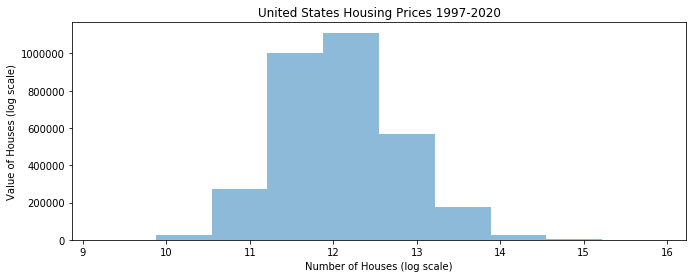

In [0]:
#Plot of Log Values
plt.hist(zillowUSA97to17['LogValue'], alpha=0.5)
plt.xlabel('Number of Houses (log scale)')
plt.ylabel('Value of Houses (log scale)')
plt.title('United States Housing Prices 1997-2020')

Text(0.5, 1.0, 'United States Housing Prices 1997-2020')

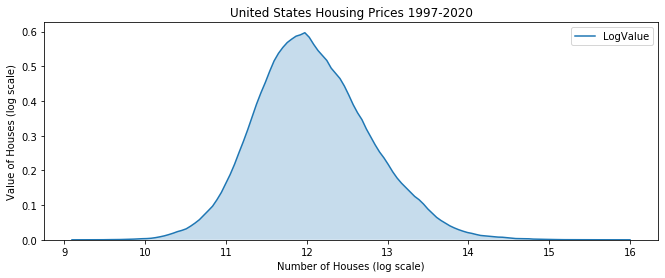

In [0]:
sns.kdeplot(zillowUSA97to17['LogValue'], shade=True)
plt.xlabel('Number of Houses (log scale)')
plt.ylabel('Value of Houses (log scale)')
plt.title('United States Housing Prices 1997-2020')

Text(0.5, 1.0, '400 Highest United States Housing Prices 1997-2020')

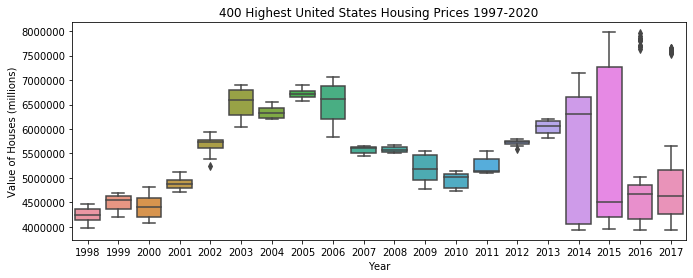

In [0]:
zillowUSATop400 = zillowUSA97to17.nlargest(400, ['Value'])
sns.boxplot(data=zillowUSATop400, x='Year', y='Value');
plt.ylabel('Value of Houses (millions)')
plt.title('400 Highest United States Housing Prices 1997-2020')

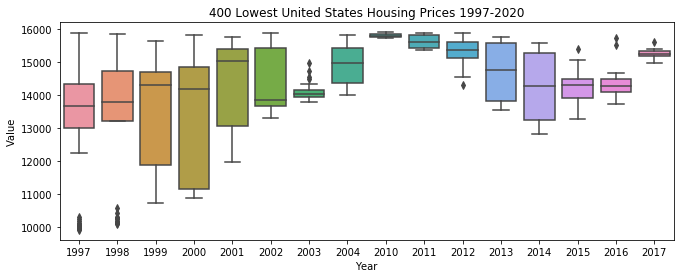

In [0]:
plt.title('400 Lowest United States Housing Prices 1997-2020')
zillowUSABottom400 = zillowUSA97to17.nsmallest(400, ['Value'])
sns.boxplot(data=zillowUSABottom400, x='Year', y='Value');

# 2.0 - MODEL

<Figure size 1152x432 with 0 Axes>

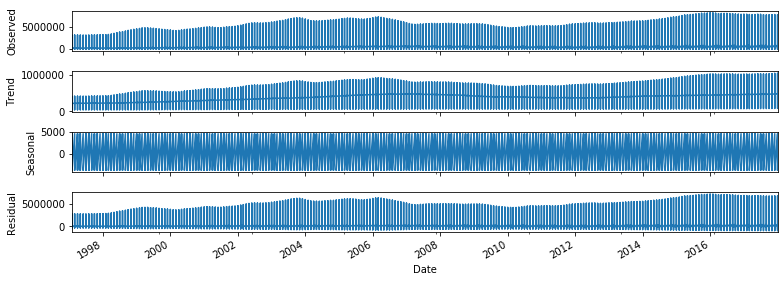

In [0]:
#Look at Residuals, Seasonal and Trend for the Zillow USA data.
#Since there is no noticeable patterns, no additional transforrmations are needed.
from pylab import rcParams
plt.figure(figsize=(16, 6))
res = sm.tsa.seasonal_decompose(zillowUSA97to17.Value,
                                freq=12,
                                model='additive')
resplot = res.plot()
resplot.savefig('Seasonal_Decompose.png', dpi=150)

# 2.1 - Prophet - Analyze All Zip Codes By Year

### 2.1.1 - GDP Functions

In [0]:
#Function to predict 2018 GDP for top ten zip codes identified with Zillow forecast
def forecastZip(zip1, zillowByZip):
    house_model = Prophet(interval_width=0.95)
    house_model.fit(zillowByZip)
    future_dates = house_model.make_future_dataframe(periods=5, freq='YS')
    forecast = house_model.predict(future_dates)
    forecast_data_zip = forecast[['yhat']].tail(5)
    forecast_data_zip_all = forecast[['yhat']]
    #Calculate the RMSE
    #se1 = forecast_data_zip_all.loc[:, 'yhat'].to_numpy()
    #se2 = zillowUSA97to18zip.loc[zillowUSA97to18zip['RegionName']==zip1].Value
    #se = np.square(se1 - se2)
    #mse = np.mean(se)
    #Create variables to pass to accumulator
    #forecast_data_zip['zip1_idx'] = forecast_data_zip.index
    forecast_data_zip['zip1'] = zip1
    #forecast_data_county['state'] = state
    #forecast_data_zip['rmse'] = np.sqrt(mse)
    
    print (forecast_data_zip)
    return forecast_data_zip

def mainGDP():
    accumulator = pd.DataFrame([], columns=['zip1', 'state'])
    for zip1, rows in GDP_Prophet.groupby('ZIP'): 
          accumulator = pd.concat([accumulator, forecastZip(zip1, rows)], axis=0)
    #print(accumulator)
    accumulator.to_csv('/content/drive/My Drive/Colab Notebooks/IST718/Lab2/ProphetOutGDP.csv','a')

In [0]:
#mainGDP()

### 2.1.2 - Zillow Functions

In [0]:
#All zip codes by year by year ~265k observations
def forecastZip(zip1, zillowByZip):
    house_model = Prophet(interval_width=0.95)
    house_model.fit(zillowByZip)
    future_dates = house_model.make_future_dataframe(periods=1, freq='YS')
    forecast = house_model.predict(future_dates)
    forecast_data_zip = forecast[['yhat']].tail(5)
    forecast_data_zip_all = forecast[['yhat']]
    #Calculate the RMSE
    se1 = forecast_data_zip_all.loc[:, 'yhat'].to_numpy()
    se2 = zillowUSA97to18zip.loc[zillowUSA97to18zip['RegionName']==zip1].Value
    se = np.square(se1 - se2)
    mse = np.mean(se)
    #Create variables to pass to accumulator
    forecast_data_zip['zip1_idx'] = forecast_data_zip.index
    forecast_data_zip['zip1'] = zip1
    #forecast_data_county['state'] = state
    forecast_data_zip['rmse'] = np.sqrt(mse)

    print (forecast_data_zip)
    return forecast_data_zip

def mainZip():
    accumulator = pd.DataFrame([], columns=['zip1', 'state','year_idx', 'yhat', 'rmse'])
    for zip1, rows in zillowZipYears.groupby('RegionName'): 
          accumulator = pd.concat([accumulator, forecastZip(zip1, rows)], axis=0)
    accumulator.to_csv('/content/drive/My Drive/Colab Notebooks/IST718/Lab2/ProphetOutZip.csv','a')

In [0]:
#mainZip()

In [0]:
# Create dataset grouped by state and week
# zillowUSAmonths = zillowUSA97to17.loc[zillowUSA97to17['RegionName']=='08401']
# #zillowUSAmonths = zillowUSA97to17.loc[zillowUSA97to17['State']=="WI"]
# #zillowUSAmonths = zillowUSAmonths.reset_index(drop=True)
# #zillowUSAmonths   = zillowUSAmonths.drop(['Month','SizeRank','RegionID'], axis=1)
# #zillowUSAmonths = zillowUSAmonths.groupby(["State","Year"],as_index=False).mean()
# #zillowUSAmonths.index = pd.to_datetime(zillowUSAmonths['Year'], format='%Y')
# #zillowUSAmonths['Date'] = zillowUSAmonths.index
# zillowUSAmonths = zillowUSAmonths.rename(index=str, columns={"Date":"ds","Value":"y"})
# zillowUSAmonths['ds'] = zillowUSAmonths.index
# zillowUSAmonths = zillowUSAmonths[["ds","y","RegionName","Year"]]
# zillowUSAmonths = zillowUSAmonths.reset_index(drop=True)

In [0]:
# #All zip codes by month
# def forecastZip(zip1, zillowByZip):
#     house_model = Prophet(interval_width=0.95)
#     house_model.fit(zillowByZip)
#     future_dates = house_model.make_future_dataframe(periods=12, freq='MS')
#     forecast = house_model.predict(future_dates)
#     forecast_data_zip = forecast[['yhat']].tail(5)
#     forecast_data_zip_all = forecast[['yhat']]
#     #Calculate the RMSE
#     # se1 = forecast_data_zip_all.loc[:, 'yhat'].to_numpy()
#     # se2 = zillowUSA97to18zip.loc[zillowUSA97to18zip['RegionName']==zip1].Value
#     # se = np.square(se1 - se2)
#     # mse = np.mean(se)
#     #Create variables to pass to accumulator
#     forecast_data_zip['zip1_idx'] = forecast_data_zip.index
#     forecast_data_zip['zip1'] = zip1
#     #forecast_data_county['state'] = state
#     #forecast_data_zip['rmse'] = np.sqrt(mse)

#     print (forecast_data_zip)
#     return forecast_data_zip

# def mainZip2():
#     accumulator = pd.DataFrame([], columns=['zip1', 'state','year_idx', 'yhat','Year'])
#     for zip1, rows in zillowUSAmonths.groupby('RegionName'): 
#           accumulator = pd.concat([accumulator, forecastZip(zip1, rows)], axis=0)
#     #accumulator.to_csv('/content/drive/My Drive/Colab Notebooks/IST718/Lab2/ProphetOutZip.csv','a')

# 2.2 - AtsPy - Analyze Single Zip Codes By Month

## 2.2.1 - Install AtsPy Packages

In [0]:
!pip install atspy
!pip install pigar
#!pip install pydantic==1.4
!pip freeze > requirements.txt
from atspy import AutomatedModel

## 2.2.2.- Functions

In [0]:
#Code for running metro against all records
def ForecastMetro(metro):
  zillowByMetro = zillowUSA97to17.loc[zillowUSA97to17['Metro']==metro]
  del zillowByMetro.index.name
  zillowByMetro = zillowByMetro.groupby(['Date'],as_index=False).mean()
  zillowByMetro = zillowByMetro[['Value', 'Date']] 
  zillowByMetro.index = pd.to_datetime(zillowByMetro['Date'], format='%Y%m%d')
  zillowByMetro = zillowByMetro.set_index('Date') 
  #if len(zillowByMetro) < 3:
    #return None
  #elif len(zillowByMetro) > 3:
    #model_list=["ARIMA","Gluonts","Prophet","NBEATS", "TBAT", "TATS", "TBATS1", "TBATP1", "TBATS2"]
  model_list=["ARIMA","Gluonts","Prophet"]
  am = AutomatedModel(df = zillowByMetro, model_list=model_list, season="infer_from_data",forecast_len=12)
  forecast_in, performance = am.forecast_insample()
  forecast_out = am.forecast_outsample()
  all_ensemble_in, all_ensemble_out, all_performance = am.ensemble(forecast_in, forecast_out)
  print(forecast_out.head(12))
  print(performance.head(12))
  all_performance
  all_ensemble_in[["Target","Prophet","ARIMA","Gluonts"]].plot()
  all_ensemble_in
  all_ensemble_out
  all_ensemble_out[["Prophet","ARIMA","Gluonts"]].plot()
  am.models_dict_in
  am.models_dict_out

<class 'pandas.core.frame.DataFrame'>
The data has been successfully parsed by infering a frequency, and establishing a 'Date' index and 'Target' column.
189
An insample split of training size 189 and testing size 63 has been constructed
Model ARIMA is being trained for in sample prediction


INFO:root:Start model training
INFO:root:Epoch[0] Learning rate is 0.001
  0%|          | 0/50 [00:00<?, ?it/s]

Model Gluonts is being trained for in sample prediction


INFO:root:Number of parameters in DeepARTrainingNetwork: 23324
100%|██████████| 50/50 [00:07<00:00,  6.79it/s, avg_epoch_loss=10.9]
INFO:root:Epoch[0] Elapsed time 7.370 seconds
INFO:root:Epoch[0] Evaluation metric 'epoch_loss'=10.932927
INFO:root:Epoch[1] Learning rate is 0.001
100%|██████████| 50/50 [00:06<00:00,  7.26it/s, avg_epoch_loss=9.7]
INFO:root:Epoch[1] Elapsed time 6.890 seconds
INFO:root:Epoch[1] Evaluation metric 'epoch_loss'=9.704382
INFO:root:Epoch[2] Learning rate is 0.001
100%|██████████| 50/50 [00:06<00:00,  7.39it/s, avg_epoch_loss=9.3]
INFO:root:Epoch[2] Elapsed time 6.773 seconds
INFO:root:Epoch[2] Evaluation metric 'epoch_loss'=9.304189
INFO:root:Epoch[3] Learning rate is 0.001
100%|██████████| 50/50 [00:06<00:00,  7.33it/s, avg_epoch_loss=9.16]
INFO:root:Epoch[3] Elapsed time 6.825 seconds
INFO:root:Epoch[3] Evaluation metric 'epoch_loss'=9.161013
INFO:root:Epoch[4] Learning rate is 0.001
100%|██████████| 50/50 [00:06<00:00,  7.32it/s, avg_epoch_loss=9.12]
INFO:

Model Prophet is being trained for in sample prediction
Model ARIMA is being used to forcast in sample
Model Gluonts is being used to forcast in sample
Model Prophet is being used to forcast in sample
Successfully finished in sample forecast
<class 'pandas.core.frame.DataFrame'>
The data has been successfully parsed by infering a frequency, and establishing a 'Date' index and 'Target' column.
Model ARIMA is being trained for out of sample prediction


INFO:root:Start model training
INFO:root:Epoch[0] Learning rate is 0.001
  0%|          | 0/50 [00:00<?, ?it/s]

Model Gluonts is being trained for out of sample prediction


INFO:root:Number of parameters in DeepARTrainingNetwork: 23324
100%|██████████| 50/50 [00:02<00:00, 19.86it/s, avg_epoch_loss=11.3]
INFO:root:Epoch[0] Elapsed time 2.521 seconds
INFO:root:Epoch[0] Evaluation metric 'epoch_loss'=11.318853
INFO:root:Epoch[1] Learning rate is 0.001
100%|██████████| 50/50 [00:01<00:00, 27.26it/s, avg_epoch_loss=9.98]
INFO:root:Epoch[1] Elapsed time 1.839 seconds
INFO:root:Epoch[1] Evaluation metric 'epoch_loss'=9.975274
INFO:root:Epoch[2] Learning rate is 0.001
100%|██████████| 50/50 [00:01<00:00, 27.52it/s, avg_epoch_loss=9.9]
INFO:root:Epoch[2] Elapsed time 1.818 seconds
INFO:root:Epoch[2] Evaluation metric 'epoch_loss'=9.895191
INFO:root:Epoch[3] Learning rate is 0.001
100%|██████████| 50/50 [00:01<00:00, 27.49it/s, avg_epoch_loss=9.7]
INFO:root:Epoch[3] Elapsed time 1.822 seconds
INFO:root:Epoch[3] Evaluation metric 'epoch_loss'=9.697621
INFO:root:Epoch[4] Learning rate is 0.001
100%|██████████| 50/50 [00:01<00:00, 27.99it/s, avg_epoch_loss=9.68]
INFO:

Model Prophet is being trained for out of sample prediction
Model ARIMA is being used to forcast out of sample
Model Gluonts is being used to forcast out of sample
Model Prophet is being used to forcast out of sample
Successfully finished out of sample forecast
Building LightGBM Ensemble from TS data (ensemble_lgb)
Building LightGBM Ensemble from PCA reduced TSFresh Features (ensemble_ts). This can take a long time.
LightGBM ensemble have been successfully built
361  variables are found to be almost constant
LightGBM ensemble have been successfully built
Building Standard First Level Ensemble
Building Final Multi-level Ensemble
                    ARIMA        Gluonts        Prophet
Date                                                   
2018-01-31  131969.149750  130640.523438  127761.860957
2018-02-28  132215.424970  129482.250000  127869.769228
2018-03-31  132399.298620  128764.539062  127997.531953
2018-04-30  132566.452711  128705.960938  128130.147863
2018-05-31  132726.068365  1

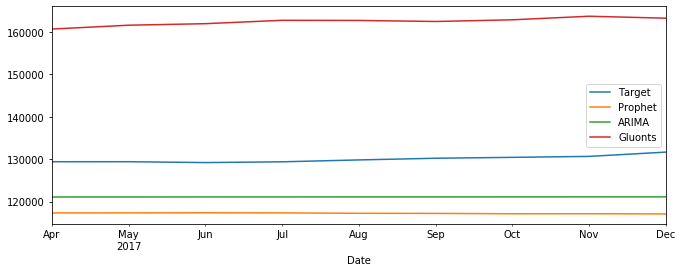

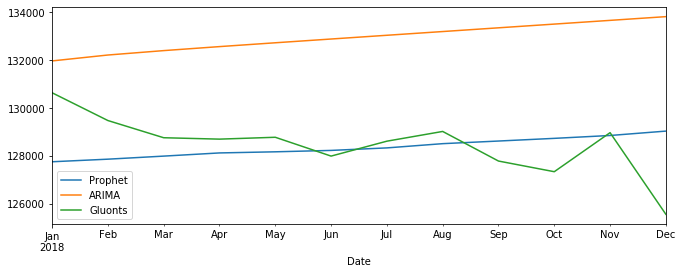

In [0]:
ForecastMetro("Hot Springs")

<class 'pandas.core.frame.DataFrame'>
The data has been successfully parsed by infering a frequency, and establishing a 'Date' index and 'Target' column.
189
An insample split of training size 189 and testing size 63 has been constructed
Model ARIMA is being trained for in sample prediction


INFO:root:Start model training
INFO:root:Epoch[0] Learning rate is 0.001
  0%|          | 0/50 [00:00<?, ?it/s]

Model Gluonts is being trained for in sample prediction


INFO:root:Number of parameters in DeepARTrainingNetwork: 23324
100%|██████████| 50/50 [00:07<00:00,  6.70it/s, avg_epoch_loss=11.4]
INFO:root:Epoch[0] Elapsed time 7.463 seconds
INFO:root:Epoch[0] Evaluation metric 'epoch_loss'=11.358181
INFO:root:Epoch[1] Learning rate is 0.001
100%|██████████| 50/50 [00:07<00:00,  6.96it/s, avg_epoch_loss=10.2]
INFO:root:Epoch[1] Elapsed time 7.186 seconds
INFO:root:Epoch[1] Evaluation metric 'epoch_loss'=10.213490
INFO:root:Epoch[2] Learning rate is 0.001
100%|██████████| 50/50 [00:06<00:00,  7.26it/s, avg_epoch_loss=9.76]
INFO:root:Epoch[2] Elapsed time 6.887 seconds
INFO:root:Epoch[2] Evaluation metric 'epoch_loss'=9.755486
INFO:root:Epoch[3] Learning rate is 0.001
100%|██████████| 50/50 [00:07<00:00,  6.84it/s, avg_epoch_loss=9.44]
INFO:root:Epoch[3] Elapsed time 7.309 seconds
INFO:root:Epoch[3] Evaluation metric 'epoch_loss'=9.438130
INFO:root:Epoch[4] Learning rate is 0.001
100%|██████████| 50/50 [00:07<00:00,  6.98it/s, avg_epoch_loss=9.24]
IN

Model Prophet is being trained for in sample prediction
Model ARIMA is being used to forcast in sample
Model Gluonts is being used to forcast in sample
Model Prophet is being used to forcast in sample
Successfully finished in sample forecast
<class 'pandas.core.frame.DataFrame'>
The data has been successfully parsed by infering a frequency, and establishing a 'Date' index and 'Target' column.
Model ARIMA is being trained for out of sample prediction


INFO:root:Start model training
INFO:root:Epoch[0] Learning rate is 0.001
  0%|          | 0/50 [00:00<?, ?it/s]INFO:root:Number of parameters in DeepARTrainingNetwork: 23324


Model Gluonts is being trained for out of sample prediction


100%|██████████| 50/50 [00:01<00:00, 27.25it/s, avg_epoch_loss=11.3]
INFO:root:Epoch[0] Elapsed time 1.838 seconds
INFO:root:Epoch[0] Evaluation metric 'epoch_loss'=11.326569
INFO:root:Epoch[1] Learning rate is 0.001
100%|██████████| 50/50 [00:01<00:00, 27.39it/s, avg_epoch_loss=10.3]
INFO:root:Epoch[1] Elapsed time 1.828 seconds
INFO:root:Epoch[1] Evaluation metric 'epoch_loss'=10.335606
INFO:root:Epoch[2] Learning rate is 0.001
100%|██████████| 50/50 [00:01<00:00, 28.09it/s, avg_epoch_loss=10.1]
INFO:root:Epoch[2] Elapsed time 1.782 seconds
INFO:root:Epoch[2] Evaluation metric 'epoch_loss'=10.062075
INFO:root:Epoch[3] Learning rate is 0.001
100%|██████████| 50/50 [00:01<00:00, 27.22it/s, avg_epoch_loss=9.89]
INFO:root:Epoch[3] Elapsed time 1.839 seconds
INFO:root:Epoch[3] Evaluation metric 'epoch_loss'=9.889426
INFO:root:Epoch[4] Learning rate is 0.001
100%|██████████| 50/50 [00:01<00:00, 25.55it/s, avg_epoch_loss=9.75]
INFO:root:Epoch[4] Elapsed time 1.962 seconds
INFO:root:Epoch[4]

Model Prophet is being trained for out of sample prediction
Model ARIMA is being used to forcast out of sample
Model Gluonts is being used to forcast out of sample
Model Prophet is being used to forcast out of sample
Successfully finished out of sample forecast
Building LightGBM Ensemble from TS data (ensemble_lgb)
Building LightGBM Ensemble from PCA reduced TSFresh Features (ensemble_ts). This can take a long time.
LightGBM ensemble have been successfully built
415  variables are found to be almost constant
LightGBM ensemble have been successfully built
Building Standard First Level Ensemble
Building Final Multi-level Ensemble
                    ARIMA        Gluonts        Prophet
Date                                                   
2018-01-31  168270.524773  165022.953125  165251.042149
2018-02-28  168763.685814  166235.296875  165829.623626
2018-03-31  169228.819205  167284.437500  166315.154901
2018-04-30  169669.535696  167762.296875  166805.095418
2018-05-31  170087.866236  1

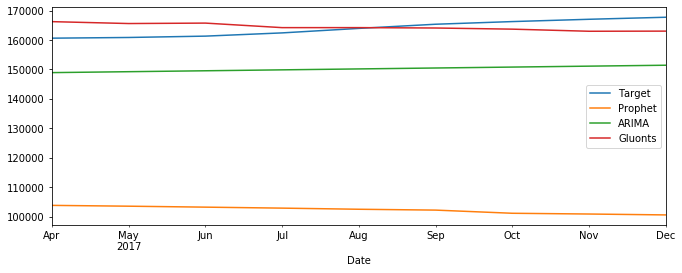

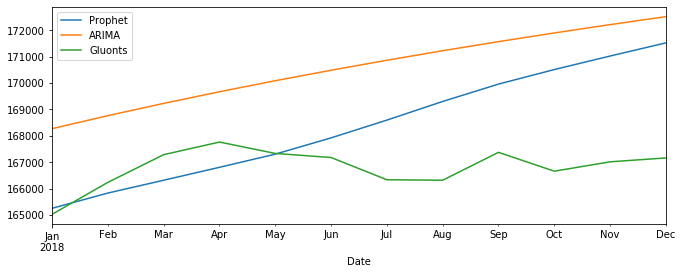

In [0]:
ForecastMetro("Fayetteville-Springdale-Rogers")

<class 'pandas.core.frame.DataFrame'>
The data has been successfully parsed by infering a frequency, and establishing a 'Date' index and 'Target' column.
189
An insample split of training size 189 and testing size 63 has been constructed
Model ARIMA is being trained for in sample prediction


INFO:root:Start model training
INFO:root:Epoch[0] Learning rate is 0.001
  0%|          | 0/50 [00:00<?, ?it/s]

Model Gluonts is being trained for in sample prediction


INFO:root:Number of parameters in DeepARTrainingNetwork: 23324
100%|██████████| 50/50 [00:07<00:00,  6.55it/s, avg_epoch_loss=11.7]
INFO:root:Epoch[0] Elapsed time 7.632 seconds
INFO:root:Epoch[0] Evaluation metric 'epoch_loss'=11.692849
INFO:root:Epoch[1] Learning rate is 0.001
100%|██████████| 50/50 [00:07<00:00,  6.97it/s, avg_epoch_loss=10.2]
INFO:root:Epoch[1] Elapsed time 7.175 seconds
INFO:root:Epoch[1] Evaluation metric 'epoch_loss'=10.154194
INFO:root:Epoch[2] Learning rate is 0.001
100%|██████████| 50/50 [00:06<00:00,  7.15it/s, avg_epoch_loss=9.46]
INFO:root:Epoch[2] Elapsed time 6.997 seconds
INFO:root:Epoch[2] Evaluation metric 'epoch_loss'=9.455878
INFO:root:Epoch[3] Learning rate is 0.001
100%|██████████| 50/50 [00:07<00:00,  7.06it/s, avg_epoch_loss=9.2]
INFO:root:Epoch[3] Elapsed time 7.088 seconds
INFO:root:Epoch[3] Evaluation metric 'epoch_loss'=9.197404
INFO:root:Epoch[4] Learning rate is 0.001
100%|██████████| 50/50 [00:07<00:00,  7.05it/s, avg_epoch_loss=9.02]
INF

Model Prophet is being trained for in sample prediction
Model ARIMA is being used to forcast in sample
Model Gluonts is being used to forcast in sample
Model Prophet is being used to forcast in sample
Successfully finished in sample forecast
<class 'pandas.core.frame.DataFrame'>
The data has been successfully parsed by infering a frequency, and establishing a 'Date' index and 'Target' column.
Model ARIMA is being trained for out of sample prediction


INFO:root:Start model training
INFO:root:Epoch[0] Learning rate is 0.001
  0%|          | 0/50 [00:00<?, ?it/s]

Model Gluonts is being trained for out of sample prediction


INFO:root:Number of parameters in DeepARTrainingNetwork: 23324
100%|██████████| 50/50 [00:01<00:00, 25.97it/s, avg_epoch_loss=10.2]
INFO:root:Epoch[0] Elapsed time 1.928 seconds
INFO:root:Epoch[0] Evaluation metric 'epoch_loss'=10.239386
INFO:root:Epoch[1] Learning rate is 0.001
100%|██████████| 50/50 [00:01<00:00, 28.02it/s, avg_epoch_loss=9.62]
INFO:root:Epoch[1] Elapsed time 1.788 seconds
INFO:root:Epoch[1] Evaluation metric 'epoch_loss'=9.623453
INFO:root:Epoch[2] Learning rate is 0.001
100%|██████████| 50/50 [00:01<00:00, 27.75it/s, avg_epoch_loss=9.35]
INFO:root:Epoch[2] Elapsed time 1.804 seconds
INFO:root:Epoch[2] Evaluation metric 'epoch_loss'=9.354769
INFO:root:Epoch[3] Learning rate is 0.001
100%|██████████| 50/50 [00:01<00:00, 27.91it/s, avg_epoch_loss=9.33]
INFO:root:Epoch[3] Elapsed time 1.797 seconds
INFO:root:Epoch[3] Evaluation metric 'epoch_loss'=9.331865
INFO:root:Epoch[4] Learning rate is 0.001
100%|██████████| 50/50 [00:01<00:00, 27.32it/s, avg_epoch_loss=9.37]
INF

Model Prophet is being trained for out of sample prediction
Model ARIMA is being used to forcast out of sample
Model Gluonts is being used to forcast out of sample
Model Prophet is being used to forcast out of sample
Successfully finished out of sample forecast
Building LightGBM Ensemble from TS data (ensemble_lgb)
Building LightGBM Ensemble from PCA reduced TSFresh Features (ensemble_ts). This can take a long time.
LightGBM ensemble have been successfully built
250  variables are found to be almost constant
LightGBM ensemble have been successfully built
Building Standard First Level Ensemble
Building Final Multi-level Ensemble
                    ARIMA        Gluonts        Prophet
Date                                                   
2018-01-31  140346.687120  137747.781250  137302.297017
2018-02-28  140845.190957  143223.156250  137499.193881
2018-03-31  141356.899845  143285.406250  137621.883345
2018-04-30  141846.756771  143787.375000  137754.100633
2018-05-31  142334.354435  1

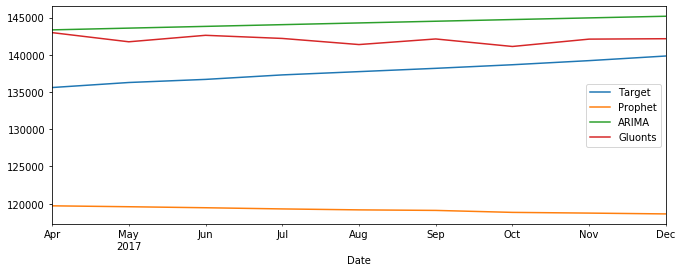

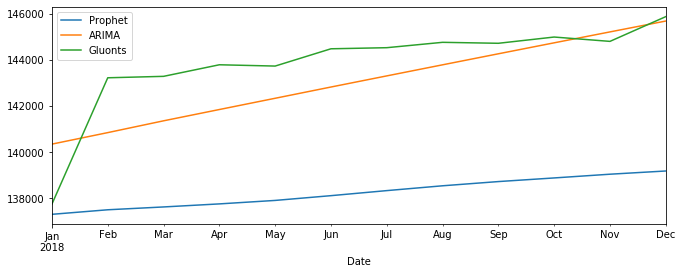

In [0]:
## NEED TO TROUBLESHOOT ERROR
ForecastMetro("Little Rock-North Little Rock-Conway")

<class 'pandas.core.frame.DataFrame'>
The data has been successfully parsed by infering a frequency, and establishing a 'Date' index and 'Target' column.
189
An insample split of training size 189 and testing size 63 has been constructed
Model ARIMA is being trained for in sample prediction


INFO:root:Start model training
INFO:root:Epoch[0] Learning rate is 0.001
  0%|          | 0/50 [00:00<?, ?it/s]

Model Gluonts is being trained for in sample prediction


INFO:root:Number of parameters in DeepARTrainingNetwork: 23324
100%|██████████| 50/50 [00:07<00:00,  6.63it/s, avg_epoch_loss=10.5]
INFO:root:Epoch[0] Elapsed time 7.546 seconds
INFO:root:Epoch[0] Evaluation metric 'epoch_loss'=10.458599
INFO:root:Epoch[1] Learning rate is 0.001
100%|██████████| 50/50 [00:07<00:00,  6.93it/s, avg_epoch_loss=9.17]
INFO:root:Epoch[1] Elapsed time 7.222 seconds
INFO:root:Epoch[1] Evaluation metric 'epoch_loss'=9.169673
INFO:root:Epoch[2] Learning rate is 0.001
100%|██████████| 50/50 [00:07<00:00,  7.10it/s, avg_epoch_loss=8.67]
INFO:root:Epoch[2] Elapsed time 7.044 seconds
INFO:root:Epoch[2] Evaluation metric 'epoch_loss'=8.665884
INFO:root:Epoch[3] Learning rate is 0.001
100%|██████████| 50/50 [00:07<00:00,  6.98it/s, avg_epoch_loss=8.5]
INFO:root:Epoch[3] Elapsed time 7.168 seconds
INFO:root:Epoch[3] Evaluation metric 'epoch_loss'=8.500529
INFO:root:Epoch[4] Learning rate is 0.001
100%|██████████| 50/50 [00:07<00:00,  7.04it/s, avg_epoch_loss=8.4]
INFO:

Model Prophet is being trained for in sample prediction
Model ARIMA is being used to forcast in sample
Model Gluonts is being used to forcast in sample
Model Prophet is being used to forcast in sample
Successfully finished in sample forecast
<class 'pandas.core.frame.DataFrame'>
The data has been successfully parsed by infering a frequency, and establishing a 'Date' index and 'Target' column.
Model ARIMA is being trained for out of sample prediction


INFO:root:Start model training
INFO:root:Epoch[0] Learning rate is 0.001
  0%|          | 0/50 [00:00<?, ?it/s]

Model Gluonts is being trained for out of sample prediction


INFO:root:Number of parameters in DeepARTrainingNetwork: 23324
100%|██████████| 50/50 [00:01<00:00, 25.38it/s, avg_epoch_loss=10.6]
INFO:root:Epoch[0] Elapsed time 1.972 seconds
INFO:root:Epoch[0] Evaluation metric 'epoch_loss'=10.640607
INFO:root:Epoch[1] Learning rate is 0.001
100%|██████████| 50/50 [00:01<00:00, 26.35it/s, avg_epoch_loss=9.4]
INFO:root:Epoch[1] Elapsed time 1.900 seconds
INFO:root:Epoch[1] Evaluation metric 'epoch_loss'=9.403199
INFO:root:Epoch[2] Learning rate is 0.001
100%|██████████| 50/50 [00:01<00:00, 27.50it/s, avg_epoch_loss=9.09]
INFO:root:Epoch[2] Elapsed time 1.821 seconds
INFO:root:Epoch[2] Evaluation metric 'epoch_loss'=9.085618
INFO:root:Epoch[3] Learning rate is 0.001
100%|██████████| 50/50 [00:01<00:00, 26.65it/s, avg_epoch_loss=9.03]
INFO:root:Epoch[3] Elapsed time 1.878 seconds
INFO:root:Epoch[3] Evaluation metric 'epoch_loss'=9.026549
INFO:root:Epoch[4] Learning rate is 0.001
100%|██████████| 50/50 [00:01<00:00, 26.50it/s, avg_epoch_loss=8.82]
INFO

Model Prophet is being trained for out of sample prediction
Model ARIMA is being used to forcast out of sample
Model Gluonts is being used to forcast out of sample
Model Prophet is being used to forcast out of sample
Successfully finished out of sample forecast
Building LightGBM Ensemble from TS data (ensemble_lgb)
Building LightGBM Ensemble from PCA reduced TSFresh Features (ensemble_ts). This can take a long time.
LightGBM ensemble have been successfully built
225  variables are found to be almost constant
LightGBM ensemble have been successfully built
Building Standard First Level Ensemble
Building Final Multi-level Ensemble
                   ARIMA       Gluonts       Prophet
Date                                                
2018-01-31  93916.778110  96490.750000  92460.610077
2018-02-28  94343.250049  97349.742188  92743.435010
2018-03-31  94571.188799  97041.929688  92986.424555
2018-04-30  94815.624544  97136.109375  93235.684713
2018-05-31  95019.929158  96803.007812  93497.

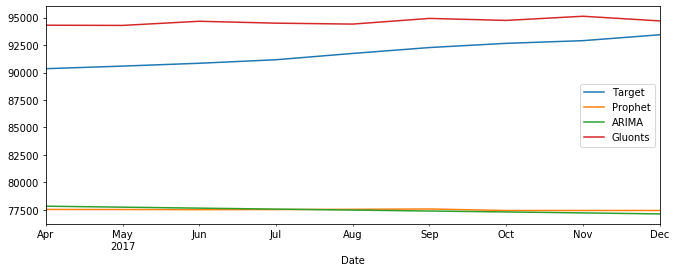

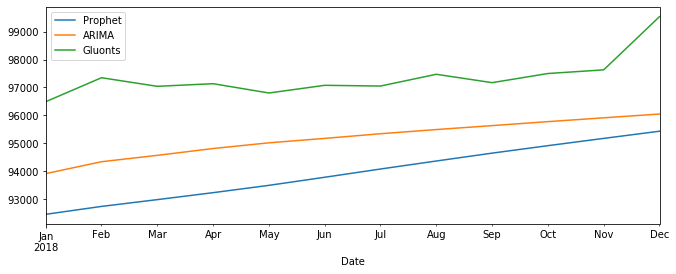

In [0]:
# NEED TO TROUBLESHOOT ERROR
ForecastMetro("Searcy")

In [0]:
#Code for running Top Zip Code Analysis
def ForecastTopZips(top):
  zillowByTopZips = zillowUSA97to17.loc[zillowUSA97to17['RegionName']==top]
  del zillowByTopZips.index.name
  zillowByTopZips = zillowByTopZips.groupby(['Date'],as_index=False).mean()
  zillowByTopZips = zillowByTopZips[['Value', 'Date']] 
  zillowByTopZips.index = pd.to_datetime(zillowByTopZips['Date'], format='%Y%m%d')
  zillowByTopZips = zillowByTopZips.set_index('Date') 
  #if len(zillowByTopZips) < 3:
    #return None
  #elif len(zillowByTopZips) > 3:
    #model_list=["ARIMA","Gluonts","Prophet","NBEATS", "TBAT", "TATS", "TBATS1", "TBATP1", "TBATS2"]
  model_list=["ARIMA","Gluonts","Prophet"]
  am = AutomatedModel(df = zillowByTopZips, model_list=model_list, season="infer_from_data",forecast_len=12)
  forecast_in, performance = am.forecast_insample()
  forecast_out = am.forecast_outsample()
  all_ensemble_in, all_ensemble_out, all_performance = am.ensemble(forecast_in, forecast_out)
  forecast_out.head()
  print(forecast_out.head(12))
  print(performance.head(12))
  all_performance
  all_ensemble_in[["Target","Prophet","ARIMA","Gluonts"]].plot()
  all_ensemble_in
  all_ensemble_out
  all_ensemble_out[["Prophet","ARIMA","Gluonts"]].plot()
  am.models_dict_in
  am.models_dict_out

<class 'pandas.core.frame.DataFrame'>
The data has been successfully parsed by infering a frequency, and establishing a 'Date' index and 'Target' column.
189
An insample split of training size 189 and testing size 63 has been constructed
Model ARIMA is being trained for in sample prediction


INFO:root:Start model training
INFO:root:Epoch[0] Learning rate is 0.001
  0%|          | 0/50 [00:00<?, ?it/s]

Model Gluonts is being trained for in sample prediction


INFO:root:Number of parameters in DeepARTrainingNetwork: 23324
100%|██████████| 50/50 [00:07<00:00,  6.70it/s, avg_epoch_loss=11.7]
INFO:root:Epoch[0] Elapsed time 7.466 seconds
INFO:root:Epoch[0] Evaluation metric 'epoch_loss'=11.687270
INFO:root:Epoch[1] Learning rate is 0.001
100%|██████████| 50/50 [00:07<00:00,  7.10it/s, avg_epoch_loss=10.4]
INFO:root:Epoch[1] Elapsed time 7.047 seconds
INFO:root:Epoch[1] Evaluation metric 'epoch_loss'=10.355639
INFO:root:Epoch[2] Learning rate is 0.001
100%|██████████| 50/50 [00:07<00:00,  7.05it/s, avg_epoch_loss=9.89]
INFO:root:Epoch[2] Elapsed time 7.090 seconds
INFO:root:Epoch[2] Evaluation metric 'epoch_loss'=9.891413
INFO:root:Epoch[3] Learning rate is 0.001
100%|██████████| 50/50 [00:07<00:00,  6.92it/s, avg_epoch_loss=9.45]
INFO:root:Epoch[3] Elapsed time 7.233 seconds
INFO:root:Epoch[3] Evaluation metric 'epoch_loss'=9.451558
INFO:root:Epoch[4] Learning rate is 0.001
100%|██████████| 50/50 [00:07<00:00,  7.12it/s, avg_epoch_loss=9.29]
IN

Model Prophet is being trained for in sample prediction
Model ARIMA is being used to forcast in sample
Model Gluonts is being used to forcast in sample
Model Prophet is being used to forcast in sample
Successfully finished in sample forecast
<class 'pandas.core.frame.DataFrame'>
The data has been successfully parsed by infering a frequency, and establishing a 'Date' index and 'Target' column.
Model ARIMA is being trained for out of sample prediction


INFO:root:Start model training
INFO:root:Epoch[0] Learning rate is 0.001
  0%|          | 0/50 [00:00<?, ?it/s]

Model Gluonts is being trained for out of sample prediction


INFO:root:Number of parameters in DeepARTrainingNetwork: 23324
100%|██████████| 50/50 [00:01<00:00, 27.39it/s, avg_epoch_loss=11.7]
INFO:root:Epoch[0] Elapsed time 1.827 seconds
INFO:root:Epoch[0] Evaluation metric 'epoch_loss'=11.695797
INFO:root:Epoch[1] Learning rate is 0.001
100%|██████████| 50/50 [00:01<00:00, 27.21it/s, avg_epoch_loss=10.8]
INFO:root:Epoch[1] Elapsed time 1.843 seconds
INFO:root:Epoch[1] Evaluation metric 'epoch_loss'=10.799505
INFO:root:Epoch[2] Learning rate is 0.001
100%|██████████| 50/50 [00:01<00:00, 28.00it/s, avg_epoch_loss=10.5]
INFO:root:Epoch[2] Elapsed time 1.789 seconds
INFO:root:Epoch[2] Evaluation metric 'epoch_loss'=10.481809
INFO:root:Epoch[3] Learning rate is 0.001
100%|██████████| 50/50 [00:01<00:00, 28.15it/s, avg_epoch_loss=10.2]
INFO:root:Epoch[3] Elapsed time 1.779 seconds
INFO:root:Epoch[3] Evaluation metric 'epoch_loss'=10.165638
INFO:root:Epoch[4] Learning rate is 0.001
100%|██████████| 50/50 [00:01<00:00, 28.32it/s, avg_epoch_loss=10.1]


Model Prophet is being trained for out of sample prediction
Model ARIMA is being used to forcast out of sample
Model Gluonts is being used to forcast out of sample
Model Prophet is being used to forcast out of sample
Successfully finished out of sample forecast
Building LightGBM Ensemble from TS data (ensemble_lgb)
Building LightGBM Ensemble from PCA reduced TSFresh Features (ensemble_ts). This can take a long time.
LightGBM ensemble have been successfully built
320  variables are found to be almost constant
LightGBM ensemble have been successfully built
Building Standard First Level Ensemble
Building Final Multi-level Ensemble
               ARIMA       Gluonts       Prophet
Date                                            
2018-01-31  102205.0  97485.640625  83787.082810
2018-02-28  104329.0  98055.109375  83130.808051
2018-03-31  106453.0  97943.656250  82260.826475
2018-04-30  108577.0  97306.429688  81490.700395
2018-05-31  110701.0  95924.992188  80795.932106
2018-06-30  112825.0 

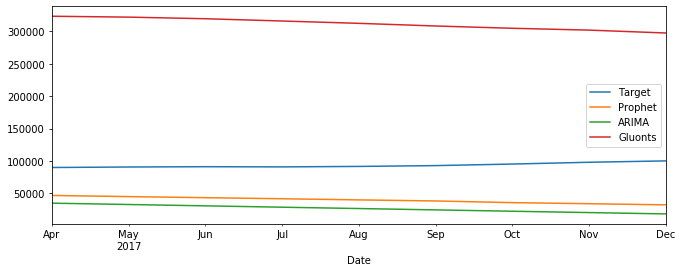

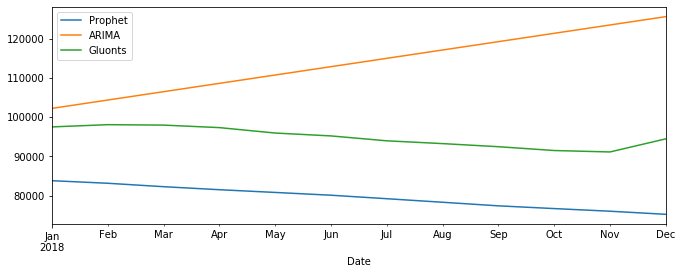

In [0]:
ForecastTopZips("08401")

<class 'pandas.core.frame.DataFrame'>
The data has been successfully parsed by infering a frequency, and establishing a 'Date' index and 'Target' column.
189
An insample split of training size 189 and testing size 63 has been constructed
Model ARIMA is being trained for in sample prediction


INFO:root:Start model training
INFO:root:Epoch[0] Learning rate is 0.001
  0%|          | 0/50 [00:00<?, ?it/s]

Model Gluonts is being trained for in sample prediction


INFO:root:Number of parameters in DeepARTrainingNetwork: 23324
100%|██████████| 50/50 [00:07<00:00,  6.58it/s, avg_epoch_loss=12.2]
INFO:root:Epoch[0] Elapsed time 7.600 seconds
INFO:root:Epoch[0] Evaluation metric 'epoch_loss'=12.237358
INFO:root:Epoch[1] Learning rate is 0.001
100%|██████████| 50/50 [00:07<00:00,  7.03it/s, avg_epoch_loss=10.5]
INFO:root:Epoch[1] Elapsed time 7.115 seconds
INFO:root:Epoch[1] Evaluation metric 'epoch_loss'=10.539493
INFO:root:Epoch[2] Learning rate is 0.001
100%|██████████| 50/50 [00:06<00:00,  7.33it/s, avg_epoch_loss=9.77]
INFO:root:Epoch[2] Elapsed time 6.825 seconds
INFO:root:Epoch[2] Evaluation metric 'epoch_loss'=9.773477
INFO:root:Epoch[3] Learning rate is 0.001
100%|██████████| 50/50 [00:06<00:00,  7.22it/s, avg_epoch_loss=9.4]
INFO:root:Epoch[3] Elapsed time 6.931 seconds
INFO:root:Epoch[3] Evaluation metric 'epoch_loss'=9.399355
INFO:root:Epoch[4] Learning rate is 0.001
100%|██████████| 50/50 [00:07<00:00,  7.10it/s, avg_epoch_loss=9.26]
INF

Model Prophet is being trained for in sample prediction
Model ARIMA is being used to forcast in sample
Model Gluonts is being used to forcast in sample
Model Prophet is being used to forcast in sample
Successfully finished in sample forecast
<class 'pandas.core.frame.DataFrame'>
The data has been successfully parsed by infering a frequency, and establishing a 'Date' index and 'Target' column.
Model ARIMA is being trained for out of sample prediction


INFO:root:Start model training
INFO:root:Epoch[0] Learning rate is 0.001
  0%|          | 0/50 [00:00<?, ?it/s]

Model Gluonts is being trained for out of sample prediction


INFO:root:Number of parameters in DeepARTrainingNetwork: 23324
100%|██████████| 50/50 [00:01<00:00, 26.44it/s, avg_epoch_loss=11.5]
INFO:root:Epoch[0] Elapsed time 1.893 seconds
INFO:root:Epoch[0] Evaluation metric 'epoch_loss'=11.463673
INFO:root:Epoch[1] Learning rate is 0.001
100%|██████████| 50/50 [00:01<00:00, 26.88it/s, avg_epoch_loss=10.6]
INFO:root:Epoch[1] Elapsed time 1.863 seconds
INFO:root:Epoch[1] Evaluation metric 'epoch_loss'=10.555128
INFO:root:Epoch[2] Learning rate is 0.001
100%|██████████| 50/50 [00:01<00:00, 26.38it/s, avg_epoch_loss=10.2]
INFO:root:Epoch[2] Elapsed time 1.898 seconds
INFO:root:Epoch[2] Evaluation metric 'epoch_loss'=10.246753
INFO:root:Epoch[3] Learning rate is 0.001
100%|██████████| 50/50 [00:01<00:00, 27.26it/s, avg_epoch_loss=10]
INFO:root:Epoch[3] Elapsed time 1.837 seconds
INFO:root:Epoch[3] Evaluation metric 'epoch_loss'=10.011412
INFO:root:Epoch[4] Learning rate is 0.001
100%|██████████| 50/50 [00:01<00:00, 26.12it/s, avg_epoch_loss=9.89]
IN

Model Prophet is being trained for out of sample prediction
Model ARIMA is being used to forcast out of sample
Model Gluonts is being used to forcast out of sample
Model Prophet is being used to forcast out of sample
Successfully finished out of sample forecast
Building LightGBM Ensemble from TS data (ensemble_lgb)
Building LightGBM Ensemble from PCA reduced TSFresh Features (ensemble_ts). This can take a long time.
LightGBM ensemble have been successfully built
406  variables are found to be almost constant
LightGBM ensemble have been successfully built
Building Standard First Level Ensemble
Building Final Multi-level Ensemble
               ARIMA       Gluonts       Prophet
Date                                            
2018-01-31   93697.0  86306.453125  82076.865228
2018-02-28   94903.0  86786.617188  81647.847156
2018-03-31   96109.0  86829.812500  81248.755384
2018-04-30   97315.0  87139.640625  80822.241680
2018-05-31   98521.0  87325.867188  80429.290678
2018-06-30   99727.0 

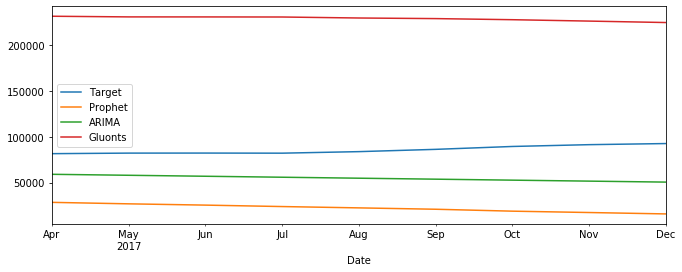

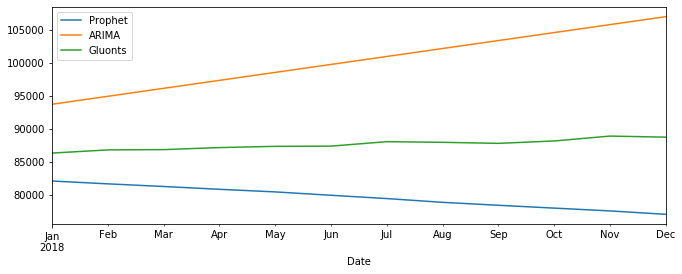

In [0]:
ForecastTopZips("08232")

<class 'pandas.core.frame.DataFrame'>
The data has been successfully parsed by infering a frequency, and establishing a 'Date' index and 'Target' column.
189
An insample split of training size 189 and testing size 63 has been constructed
Model ARIMA is being trained for in sample prediction


INFO:root:Start model training
INFO:root:Epoch[0] Learning rate is 0.001
  0%|          | 0/50 [00:00<?, ?it/s]

Model Gluonts is being trained for in sample prediction


INFO:root:Number of parameters in DeepARTrainingNetwork: 23324
100%|██████████| 50/50 [00:07<00:00,  6.65it/s, avg_epoch_loss=11.5]
INFO:root:Epoch[0] Elapsed time 7.524 seconds
INFO:root:Epoch[0] Evaluation metric 'epoch_loss'=11.470488
INFO:root:Epoch[1] Learning rate is 0.001
100%|██████████| 50/50 [00:07<00:00,  7.00it/s, avg_epoch_loss=10.4]
INFO:root:Epoch[1] Elapsed time 7.150 seconds
INFO:root:Epoch[1] Evaluation metric 'epoch_loss'=10.357774
INFO:root:Epoch[2] Learning rate is 0.001
100%|██████████| 50/50 [00:07<00:00,  6.90it/s, avg_epoch_loss=10]
INFO:root:Epoch[2] Elapsed time 7.245 seconds
INFO:root:Epoch[2] Evaluation metric 'epoch_loss'=10.041204
INFO:root:Epoch[3] Learning rate is 0.001
100%|██████████| 50/50 [00:07<00:00,  6.96it/s, avg_epoch_loss=9.79]
INFO:root:Epoch[3] Elapsed time 7.193 seconds
INFO:root:Epoch[3] Evaluation metric 'epoch_loss'=9.794474
INFO:root:Epoch[4] Learning rate is 0.001
100%|██████████| 50/50 [00:07<00:00,  6.61it/s, avg_epoch_loss=9.63]
INF

Model Prophet is being trained for in sample prediction
Model ARIMA is being used to forcast in sample
Model Gluonts is being used to forcast in sample
Model Prophet is being used to forcast in sample
Successfully finished in sample forecast
<class 'pandas.core.frame.DataFrame'>
The data has been successfully parsed by infering a frequency, and establishing a 'Date' index and 'Target' column.
Model ARIMA is being trained for out of sample prediction


INFO:root:Start model training
INFO:root:Epoch[0] Learning rate is 0.001
  0%|          | 0/50 [00:00<?, ?it/s]

Model Gluonts is being trained for out of sample prediction


INFO:root:Number of parameters in DeepARTrainingNetwork: 23324
100%|██████████| 50/50 [00:01<00:00, 25.69it/s, avg_epoch_loss=11.7]
INFO:root:Epoch[0] Elapsed time 1.952 seconds
INFO:root:Epoch[0] Evaluation metric 'epoch_loss'=11.660034
INFO:root:Epoch[1] Learning rate is 0.001
100%|██████████| 50/50 [00:01<00:00, 26.76it/s, avg_epoch_loss=10.4]
INFO:root:Epoch[1] Elapsed time 1.871 seconds
INFO:root:Epoch[1] Evaluation metric 'epoch_loss'=10.414443
INFO:root:Epoch[2] Learning rate is 0.001
100%|██████████| 50/50 [00:01<00:00, 27.51it/s, avg_epoch_loss=10.3]
INFO:root:Epoch[2] Elapsed time 1.819 seconds
INFO:root:Epoch[2] Evaluation metric 'epoch_loss'=10.281640
INFO:root:Epoch[3] Learning rate is 0.001
100%|██████████| 50/50 [00:01<00:00, 27.57it/s, avg_epoch_loss=10.1]
INFO:root:Epoch[3] Elapsed time 1.816 seconds
INFO:root:Epoch[3] Evaluation metric 'epoch_loss'=10.054057
INFO:root:Epoch[4] Learning rate is 0.001
100%|██████████| 50/50 [00:01<00:00, 27.77it/s, avg_epoch_loss=10.1]


Model Prophet is being trained for out of sample prediction
Model ARIMA is being used to forcast out of sample
Model Gluonts is being used to forcast out of sample
Model Prophet is being used to forcast out of sample
Successfully finished out of sample forecast
Building LightGBM Ensemble from TS data (ensemble_lgb)
Building LightGBM Ensemble from PCA reduced TSFresh Features (ensemble_ts). This can take a long time.
LightGBM ensemble have been successfully built
238  variables are found to be almost constant
LightGBM ensemble have been successfully built
Building Standard First Level Ensemble
Building Final Multi-level Ensemble
                   ARIMA       Gluonts       Prophet
Date                                                
2018-01-31  77843.772965  77532.656250  67747.439210
2018-02-28  78650.559639  80587.093750  67422.730492
2018-03-31  79450.971826  82286.937500  67157.341786
2018-04-30  80248.803765  82873.625000  66954.362833
2018-05-31  81041.989857  84288.859375  66622.

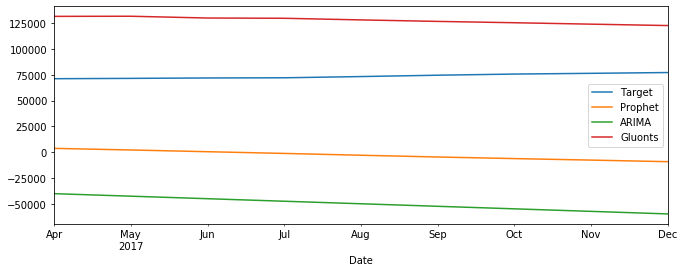

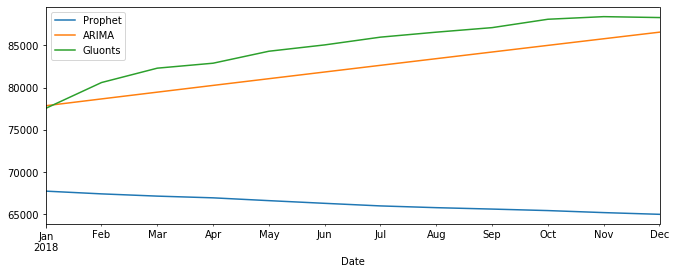

In [0]:
ForecastTopZips("60475")

<class 'pandas.core.frame.DataFrame'>
The data has been successfully parsed by infering a frequency, and establishing a 'Date' index and 'Target' column.
189
An insample split of training size 189 and testing size 63 has been constructed
Model ARIMA is being trained for in sample prediction


INFO:root:Start model training
INFO:root:Epoch[0] Learning rate is 0.001
  0%|          | 0/50 [00:00<?, ?it/s]

Model Gluonts is being trained for in sample prediction


INFO:root:Number of parameters in DeepARTrainingNetwork: 23324
100%|██████████| 50/50 [00:07<00:00,  6.79it/s, avg_epoch_loss=12.4]
INFO:root:Epoch[0] Elapsed time 7.366 seconds
INFO:root:Epoch[0] Evaluation metric 'epoch_loss'=12.355299
INFO:root:Epoch[1] Learning rate is 0.001
100%|██████████| 50/50 [00:07<00:00,  7.12it/s, avg_epoch_loss=10.9]
INFO:root:Epoch[1] Elapsed time 7.029 seconds
INFO:root:Epoch[1] Evaluation metric 'epoch_loss'=10.887758
INFO:root:Epoch[2] Learning rate is 0.001
100%|██████████| 50/50 [00:06<00:00,  7.22it/s, avg_epoch_loss=10.4]
INFO:root:Epoch[2] Elapsed time 6.929 seconds
INFO:root:Epoch[2] Evaluation metric 'epoch_loss'=10.432852
INFO:root:Epoch[3] Learning rate is 0.001
100%|██████████| 50/50 [00:07<00:00,  6.96it/s, avg_epoch_loss=10.2]
INFO:root:Epoch[3] Elapsed time 7.183 seconds
INFO:root:Epoch[3] Evaluation metric 'epoch_loss'=10.155085
INFO:root:Epoch[4] Learning rate is 0.001
100%|██████████| 50/50 [00:07<00:00,  7.08it/s, avg_epoch_loss=9.99]


Model Prophet is being trained for in sample prediction
Model ARIMA is being used to forcast in sample
Model Gluonts is being used to forcast in sample
Model Prophet is being used to forcast in sample
Successfully finished in sample forecast
<class 'pandas.core.frame.DataFrame'>
The data has been successfully parsed by infering a frequency, and establishing a 'Date' index and 'Target' column.
Model ARIMA is being trained for out of sample prediction


INFO:root:Start model training
INFO:root:Epoch[0] Learning rate is 0.001
  0%|          | 0/50 [00:00<?, ?it/s]

Model Gluonts is being trained for out of sample prediction


INFO:root:Number of parameters in DeepARTrainingNetwork: 23324
100%|██████████| 50/50 [00:01<00:00, 25.92it/s, avg_epoch_loss=12.1]
INFO:root:Epoch[0] Elapsed time 1.931 seconds
INFO:root:Epoch[0] Evaluation metric 'epoch_loss'=12.133026
INFO:root:Epoch[1] Learning rate is 0.001
100%|██████████| 50/50 [00:01<00:00, 28.58it/s, avg_epoch_loss=11.3]
INFO:root:Epoch[1] Elapsed time 1.751 seconds
INFO:root:Epoch[1] Evaluation metric 'epoch_loss'=11.295244
INFO:root:Epoch[2] Learning rate is 0.001
100%|██████████| 50/50 [00:01<00:00, 26.67it/s, avg_epoch_loss=11.1]
INFO:root:Epoch[2] Elapsed time 1.877 seconds
INFO:root:Epoch[2] Evaluation metric 'epoch_loss'=11.120399
INFO:root:Epoch[3] Learning rate is 0.001
100%|██████████| 50/50 [00:01<00:00, 26.30it/s, avg_epoch_loss=10.9]
INFO:root:Epoch[3] Elapsed time 1.903 seconds
INFO:root:Epoch[3] Evaluation metric 'epoch_loss'=10.865227
INFO:root:Epoch[4] Learning rate is 0.001
100%|██████████| 50/50 [00:01<00:00, 27.94it/s, avg_epoch_loss=10.7]


Model Prophet is being trained for out of sample prediction
Model ARIMA is being used to forcast out of sample
Model Gluonts is being used to forcast out of sample
Model Prophet is being used to forcast out of sample
Successfully finished out of sample forecast
Building LightGBM Ensemble from TS data (ensemble_lgb)
Building LightGBM Ensemble from PCA reduced TSFresh Features (ensemble_ts). This can take a long time.
LightGBM ensemble have been successfully built
336  variables are found to be almost constant
LightGBM ensemble have been successfully built
Building Standard First Level Ensemble
Building Final Multi-level Ensemble
               ARIMA        Gluonts        Prophet
Date                                              
2018-01-31  211932.0  224792.625000  228664.170272
2018-02-28  210867.0  225919.406250  227386.651523
2018-03-31  209802.0  227579.062500  226989.464163
2018-04-30  208737.0  226235.046875  226382.760525
2018-05-31  207672.0  227471.375000  225370.959523
2018-06

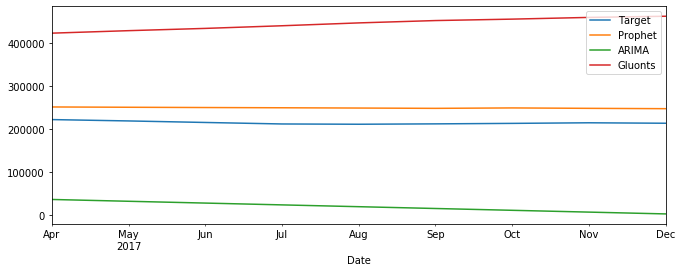

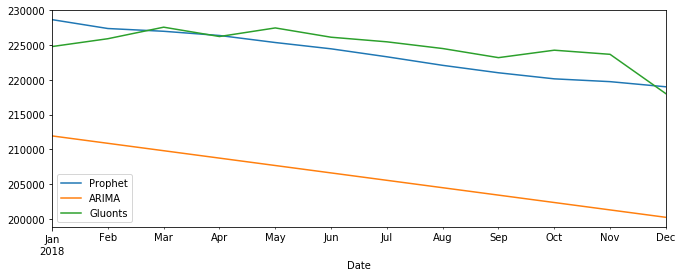

In [0]:
ForecastTopZips("08241")

<class 'pandas.core.frame.DataFrame'>
The data has been successfully parsed by infering a frequency, and establishing a 'Date' index and 'Target' column.
189
An insample split of training size 189 and testing size 63 has been constructed
Model ARIMA is being trained for in sample prediction


INFO:root:Start model training
INFO:root:Epoch[0] Learning rate is 0.001
  0%|          | 0/50 [00:00<?, ?it/s]

Model Gluonts is being trained for in sample prediction


INFO:root:Number of parameters in DeepARTrainingNetwork: 23324
100%|██████████| 50/50 [00:07<00:00,  6.77it/s, avg_epoch_loss=11.1]
INFO:root:Epoch[0] Elapsed time 7.391 seconds
INFO:root:Epoch[0] Evaluation metric 'epoch_loss'=11.136551
INFO:root:Epoch[1] Learning rate is 0.001
100%|██████████| 50/50 [00:06<00:00,  7.18it/s, avg_epoch_loss=9.57]
INFO:root:Epoch[1] Elapsed time 6.966 seconds
INFO:root:Epoch[1] Evaluation metric 'epoch_loss'=9.569014
INFO:root:Epoch[2] Learning rate is 0.001
100%|██████████| 50/50 [00:06<00:00,  7.44it/s, avg_epoch_loss=9.01]
INFO:root:Epoch[2] Elapsed time 6.718 seconds
INFO:root:Epoch[2] Evaluation metric 'epoch_loss'=9.010541
INFO:root:Epoch[3] Learning rate is 0.001
100%|██████████| 50/50 [00:07<00:00,  7.09it/s, avg_epoch_loss=8.77]
INFO:root:Epoch[3] Elapsed time 7.058 seconds
INFO:root:Epoch[3] Evaluation metric 'epoch_loss'=8.768978
INFO:root:Epoch[4] Learning rate is 0.001
100%|██████████| 50/50 [00:06<00:00,  7.17it/s, avg_epoch_loss=8.72]
INF

Model Prophet is being trained for in sample prediction
Model ARIMA is being used to forcast in sample
Model Gluonts is being used to forcast in sample
Model Prophet is being used to forcast in sample
Successfully finished in sample forecast
<class 'pandas.core.frame.DataFrame'>
The data has been successfully parsed by infering a frequency, and establishing a 'Date' index and 'Target' column.
Model ARIMA is being trained for out of sample prediction


INFO:root:Start model training
INFO:root:Epoch[0] Learning rate is 0.001
  0%|          | 0/50 [00:00<?, ?it/s]

Model Gluonts is being trained for out of sample prediction


INFO:root:Number of parameters in DeepARTrainingNetwork: 23324
100%|██████████| 50/50 [00:01<00:00, 25.85it/s, avg_epoch_loss=10.8]
INFO:root:Epoch[0] Elapsed time 1.940 seconds
INFO:root:Epoch[0] Evaluation metric 'epoch_loss'=10.847426
INFO:root:Epoch[1] Learning rate is 0.001
100%|██████████| 50/50 [00:01<00:00, 28.01it/s, avg_epoch_loss=9.77]
INFO:root:Epoch[1] Elapsed time 1.787 seconds
INFO:root:Epoch[1] Evaluation metric 'epoch_loss'=9.772832
INFO:root:Epoch[2] Learning rate is 0.001
100%|██████████| 50/50 [00:01<00:00, 27.96it/s, avg_epoch_loss=9.67]
INFO:root:Epoch[2] Elapsed time 1.790 seconds
INFO:root:Epoch[2] Evaluation metric 'epoch_loss'=9.670179
INFO:root:Epoch[3] Learning rate is 0.001
100%|██████████| 50/50 [00:01<00:00, 28.18it/s, avg_epoch_loss=9.58]
INFO:root:Epoch[3] Elapsed time 1.778 seconds
INFO:root:Epoch[3] Evaluation metric 'epoch_loss'=9.575259
INFO:root:Epoch[4] Learning rate is 0.001
100%|██████████| 50/50 [00:01<00:00, 28.46it/s, avg_epoch_loss=9.41]
INF

Model Prophet is being trained for out of sample prediction
Model ARIMA is being used to forcast out of sample
Model Gluonts is being used to forcast out of sample
Model Prophet is being used to forcast out of sample
Successfully finished out of sample forecast
Building LightGBM Ensemble from TS data (ensemble_lgb)
Building LightGBM Ensemble from PCA reduced TSFresh Features (ensemble_ts). This can take a long time.
LightGBM ensemble have been successfully built
233  variables are found to be almost constant
LightGBM ensemble have been successfully built
Building Standard First Level Ensemble
Building Final Multi-level Ensemble
                   ARIMA       Gluonts       Prophet
Date                                                
2018-01-31  39011.661597  44137.785156  40682.134683
2018-02-28  38225.561705  43260.949219  40593.913774
2018-03-31  37276.581250  43710.464844  40277.387548
2018-04-30  36552.744025  43378.925781  39999.699006
2018-05-31  35575.084400  43653.378906  39676.

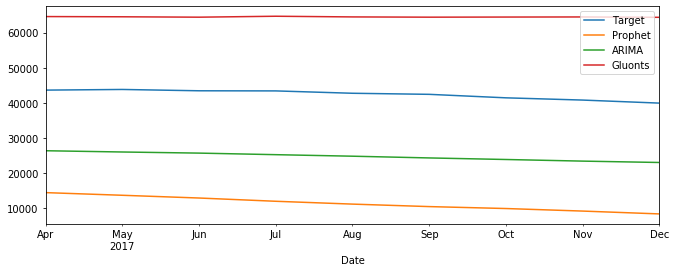

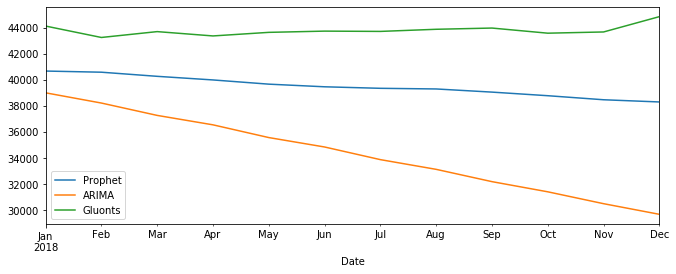

In [0]:
ForecastTopZips("19013")

# 3.0 - INTERPRET

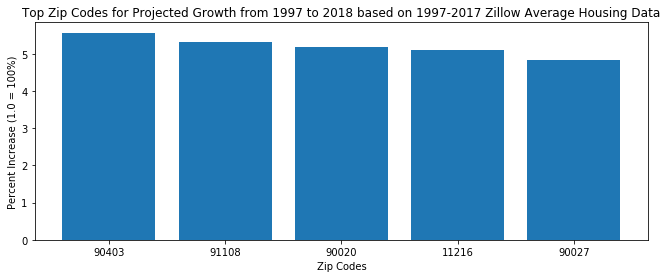

In [0]:
#Bar plot of Forecast growth using Zillow data from 1997-2017 data and predicting 2018
height = Z_Top5_97_18.Growth97_18.sort_values(ascending=False)
bars = Z_Top5_97_18.RegionName
y_pos = np.arange(len(bars))
 # Create bars
plt.bar(y_pos, height)
# Create names on the x-axis
plt.xticks(y_pos, bars)
# Add title and axis names
plt.title('Top Zip Codes for Projected Growth from 1997 to 2018 based on 1997-2017 Zillow Average Housing Data')
plt.xlabel('Zip Codes')
plt.ylabel('Percent Increase (1.0 = 100%)')
# Show graphic
plt.show()

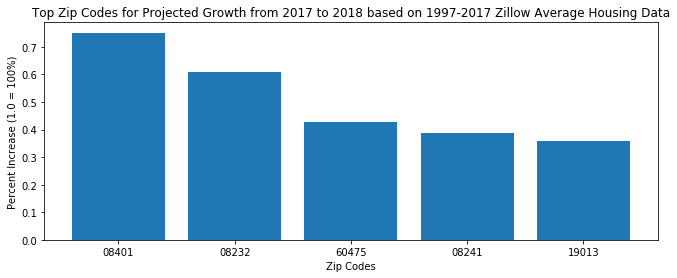

In [0]:
#Bar plot of Forecast growth using Zillow data from 1997-2017 data and predicting 2018
height = Z_Top5_17_18.Growth17_18.sort_values(ascending=False)
bars = Z_Top5_17_18.RegionName
y_pos = np.arange(len(bars))
 # Create bars
plt.bar(y_pos, height)
# Create names on the x-axis
plt.xticks(y_pos, bars)
# Add title and axis names
plt.title('Top Zip Codes for Projected Growth from 2017 to 2018 based on 1997-2017 Zillow Average Housing Data')
plt.xlabel('Zip Codes')
plt.ylabel('Percent Increase (1.0 = 100%)')
# Show graphic
plt.show()

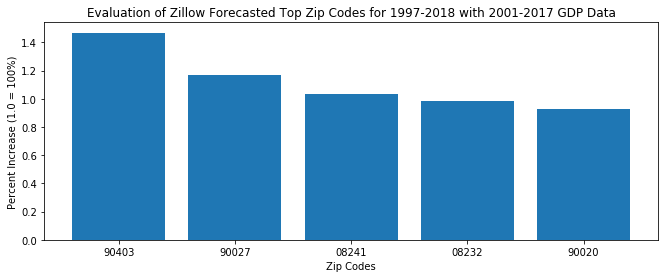

In [0]:
#Bar plot of Forecast GDP growth using 2001-2017 data and predicting 2018
height = G_Top5_01_18.Growth01_18.sort_values(ascending=False)
bars = G_Top5_01_18.ZIP_x
y_pos = np.arange(len(bars))
 # Create bars
plt.bar(y_pos, height)
# Create names on the x-axis
plt.xticks(y_pos, bars)
# Add title and axis names
plt.title('Evaluation of Zillow Forecasted Top Zip Codes for 1997-2018 with 2001-2017 GDP Data')
plt.xlabel('Zip Codes')
plt.ylabel('Percent Increase (1.0 = 100%)')
# Show graphic
plt.show()

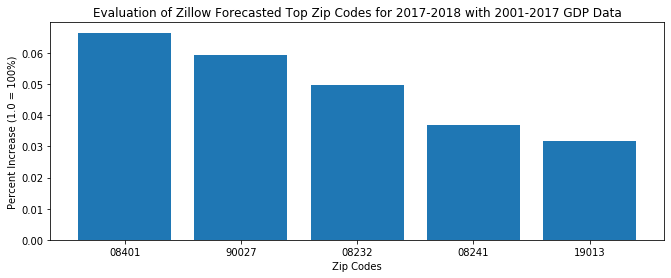

In [0]:
#Bar plot of Forecast GDP growth using 2001-2017 data and predicting 2018
height = G_Top5_17_18.Growth17_18.sort_values(ascending=False)
bars = G_Top5_17_18.ZIP_x
y_pos = np.arange(len(bars))
 # Create bars
plt.bar(y_pos, height)
# Create names on the x-axis
plt.xticks(y_pos, bars)
# Add title and axis names
plt.title('Evaluation of Zillow Forecasted Top Zip Codes for 2017-2018 with 2001-2017 GDP Data')
plt.xlabel('Zip Codes')
plt.ylabel('Percent Increase (1.0 = 100%)')
# Show graphic
plt.show()

In [0]:
raise SystemExit("Stop right there!")

SystemExit: ignored

# 4.0 - MAPPING

In [0]:
ZipMap = pd.read_csv("/content/drive/My Drive/Colab Notebooks/IST718/Lab2/us-zip-code-latitude-and-longitude.csv", sep=';')
ZipMap

In [0]:
#Create df with name,pop, lat, lon (School, TotalComp, latitude, longitude)

df = coaches5[['School','TotalComp','latitude','longitude','Conference']]
df = df.sort_values(by=['Conference'],ascending=True)
df = df.reset_index()

In [0]:
# THIS IS AN INTERACTIVE GRAPHIC.  CLICK THE LEGEND BUBBLES TO SHOW/HIDE DIFFERENT REGIONS.
# The plot could be improved by replacing the numbers in the legend with the names of the regions.
# However, this was difficult technically and the left legend was added as a temporary solution.

#Geographic view of Coaches Compensation by School.  Code Source: https://plotly.com/python/bubble-maps/
#df['text'] = df['School'] + " " + (df['TotalComp']/1e6).astype(str)+' million'
limits = [(0,9),(9,23),(23,32),(32,46),(46,59),(59,62),(62,73),(73,85),(85,97),(97,110)]
colors = ["royalblue","crimson","lightseagreen","orange","lightgrey"]
#cities = []
scale = 5000

fig = go.Figure()

for i in range(len(limits)):
    lim = limits[i]
    df_sub = df[lim[0]:lim[1]]
    fig.add_trace(go.Scattergeo(
        locationmode = 'USA-states',
        lon = df_sub['longitude'],
        lat = df_sub['latitude'],
        #text = df_sub['School'],
        text = df_sub['text'],
        marker = dict(
            size = df_sub['TotalComp']/scale,
            #color = colors[i],
            line_color='rgb(40,40,40)',
            line_width=0.5,
            sizemode = 'area'
        ),
        name = '{0} - {1}'.format(lim[0],lim[1])))

fig.update_layout(
        title_text = 'NCAA Division 1 Coaches by Total Compensation\
        <br><br>AAC(0-9)<br>ACC(9-23)\
        <br>Big 12(23-32)<br>Big Ten(32-46)<br>C-USA(46-59)<br>Ind.(59-62)\
        <br>MAC(62-73)<br>Mt. West(73-85)<br>PAC-12(85-97)<br>SEC(97-110)\
        <br><br>(Click legend to<br> toggle Conferences)',
        showlegend = True,
        geo = dict(
            scope = 'usa',
            landcolor = 'rgb(217, 217, 217)',
        )
    )
fig.show()

# Time Series Code Book

In [0]:
from statsmodels.tsa.stattools import adfuller
 
# create a differenced series
def difference(dataset, interval=1):
	diff = list()
	for i in range(interval, len(dataset)):
		value = dataset[i] - dataset[i - interval]
		diff.append(value)
	return Series(diff)

#series1 = Series.from_csv('data/Dept1.csv', header=0)

X = zillowARseries.values
X = X.astype('float32')
# difference data
months_in_year = 12
stationary = difference(X, months_in_year)
stationary = stationary.astype("float")
stationary.index = zillowARseries.index[months_in_year:]
# check if stationary
result = adfuller(stationary)
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')
for key, value in result[4].items():
	print('\t%s: %.3f' % (key, value))
# save
stationary.to_csv('/content/drive/My Drive/Colab Notebooks/stationary.csv')
# plot
stationary.plot()
#pyplot.show()

In [0]:
# invert differenced value
def inverse_difference(history, yhat, interval=1):
	return yhat + history[-interval]

In [0]:
# USING STATIONARY TIME SERIES LOOK FOR ACF & PACF
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.graphics.tsaplots import plot_pacf

stationary = read_csv('/content/drive/My Drive/Colab Notebooks/stationary.csv', header=0, parse_dates=[0], index_col=0, squeeze=True)

stationary.plot()
pyplot.show()

plot_acf(stationary, ax=pyplot.gca())
pyplot.show()

plot_pacf(stationary, ax=pyplot.gca())
pyplot.show()

## DEPICTS SOME SEASONALITY IN PACF STILL
## START POINT FOR ARIMA COULD BE 2,1,1

In [0]:
##CHECK THAT THERE ARE ENOUGH OBSERVATIONS IN VALIDATION

# CREATE TRAIN-TEST DATA
# DATA IS WEEKLY FOR 2+ years
# KEEP ONE QUARTER - 13 weeks - AS THE TEST DATA
#series = Series.from_csv('data/Dept1.csv', header=0)
split_point = len(zillowARseries) - 13
dataset, validation = zillowARseries[0:split_point], zillowARseries[split_point:]
print('Dataset %d, Validation %d' % (len(dataset), len(validation)))
dataset.to_csv('/content/drive/My Drive/Colab Notebooks/dataset.csv')
validation.to_csv('/content/drive/My Drive/Colab Notebooks/validation.csv')

In [0]:
# create a differenced series
def difference(dataset, interval=1):
	diff = list()
	for i in range(interval, len(dataset)):
		value = dataset[i] - dataset[i - interval]
		diff.append(value)
	return diff

In [0]:
# invert differenced value
def inverse_difference(history, yhat, interval=1):
	return yhat + history[-interval]

In [0]:
#Check GPU type for Colab
gpu_info = !nvidia-smi
gpu_info = '\n'.join(gpu_info)
if gpu_info.find('failed') >= 0:
  print('Select the Runtime → "Change runtime type" menu to enable a GPU accelerator, ')
  print('and then re-execute this cell.')
else:
  print(gpu_info)

In [0]:
#Check RAM usage in Colab
from psutil import virtual_memory
ram_gb = virtual_memory().total / 1e9
print('Your runtime has {:.1f} gigabytes of available RAM\n'.format(ram_gb))

if ram_gb < 20:
  print('To enable a high-RAM runtime, select the Runtime → "Change runtime type"')
  print('menu, and then select High-RAM in the Runtime shape dropdown. Then, ')
  print('re-execute this cell.')
else:
  print('You are using a high-RAM runtime!')

In [0]:
# load data
datasetSer = read_csv('/content/drive/My Drive/Colab Notebooks/dataset.csv', header=0, parse_dates=[0], index_col=0, squeeze=True)

# prepare data
X = datasetSer.values
X = X.astype('float32')
train_size = int(len(X) * 0.50)
train, test = X[0:train_size], X[train_size:]
# walk-forward validation
history = [x for x in train]
predictions = list()
for i in range(len(test)):
	# difference data
	months_in_year = 12
	diff = difference(history, months_in_year)
	# predict
	model = ARIMA(diff, order=(2,1,0))
	model_fit = model.fit(trend='nc', disp=0)
	yhat = model_fit.forecast()[0]
	yhat = inverse_difference(history, yhat, months_in_year)
	predictions.append(yhat)
	# observation
	obs = test[i]
	history.append(obs)
	print('>Predicted=%.3f, Expected=%3.f' % (yhat, obs))


In [0]:
# report performance
mse = mean_squared_error(test, predictions)
rmse = sqrt(mse)
print('RMSE: %.3f' % rmse)

In [0]:
# # CODE RUNS LONG FOR EVALUATION - approximately 
# import warnings
# import numpy
 
# # create a differenced series
# def difference(dataset, interval=1):
# 	diff = list()
# 	for i in range(interval, len(dataset)):
# 		value = dataset[i] - dataset[i - interval]
# 		diff.append(value)
# 	return numpy.array(diff)
 
# # invert differenced value
# def inverse_difference(history, yhat, interval=1):
# 	return yhat + history[-interval]
 
# # evaluate an ARIMA model for a given order (p,d,q) and return RMSE
# def evaluate_arima_model(X, arima_order):
# 	# prepare training dataset
# 	X = X.astype('float32')
# 	train_size = int(len(X) * 0.50)
# 	train, test = X[0:train_size], X[train_size:]
# 	history = [x for x in train]
# 	# make predictions
# 	predictions = list()
# 	for t in range(len(test)):
# 		# difference data
# 		months_in_year = 12
# 		diff = difference(history, months_in_year)
# 		model = ARIMA(diff, order=arima_order)
# 		model_fit = model.fit(trend='nc', disp=0)
# 		yhat = model_fit.forecast()[0]
# 		yhat = inverse_difference(history, yhat, months_in_year)
# 		predictions.append(yhat)
# 		history.append(test[t])
# 	# calculate out of sample error
# 	mse = mean_squared_error(test, predictions)
# 	rmse = sqrt(mse)
# 	return rmse
 
# # evaluate combinations of p, d and q values for an ARIMA model
# def evaluate_models(dataset, p_values, d_values, q_values):
# 	dataset = dataset.astype('float32')
# 	best_score, best_cfg = float("inf"), None
# 	for p in p_values:
# 		for d in d_values:
# 			for q in q_values:
# 				order = (p,d,q)
# 				try:
# 					mse = evaluate_arima_model(dataset, order)
# 					if mse < best_score:
# 						best_score, best_cfg = mse, order
# 					print('ARIMA%s RMSE=%.3f' % (order,mse))
# 				except:
# 					continue
# 	print('Best ARIMA%s RMSE=%.3f' % (best_cfg, best_score))
 
# # load dataset
# #series = Series.from_csv('data/Dept1.csv', header=0)
# # evaluate parameters
# p_values = range(0, 7)
# d_values = range(0, 3)
# q_values = range(0, 7)
# warnings.filterwarnings("ignore")
# evaluate_models(zillowARseries.values, p_values, d_values, q_values)

# #COMMENTS FROM PROFESSOR FOX ON VALUES BELOW:
# #AUTOREGRESSIVE STARTS AT 0
# #INTEGRATIVE ELEMENT STARTES AT 0 (FOR SEASONALITY AND TREND)
# #MOVING AVERAGE STARTS AT 1
# #CALCULATE ROOT MEAN SQUARED FOR EACH CONFIGURATION AND PROVIDE THE BEST
# #RUN ONE MORE TEST OF RESIDUALS AS HISTORGRAM AND DENSITY PLOTS (MEAN 0 WITH STD DISTRIBUTION)

In [0]:
# create a differenced series
def difference(dataset, interval=1):
	diff = list()
	for i in range(interval, len(dataset)):
		value = dataset[i] - dataset[i - interval]
		diff.append(value)
	return diff
 
# invert differenced value
def inverse_difference(history, yhat, interval=1):
	return yhat + history[-interval]
 
# load data
#series = Series.from_csv('data/Dept1.csv', header=0)
# prepare data
X = zillowARseries.values
X = X.astype('float32')
train_size = int(len(X) * 0.50)
train, test = X[0:train_size], X[train_size:]
# walk-forward validation
history = [x for x in train]
predictions = list()
for i in range(len(test)):
	# difference data
	months_in_year = 12
	diff = difference(history, months_in_year)
	# predict
	model = ARIMA(diff, order=(2,0,0))
	model_fit = model.fit(trend='nc', disp=0)
	yhat = model_fit.forecast()[0]
	yhat = inverse_difference(history, yhat, months_in_year)
	predictions.append(yhat)
	# observation
	obs = test[i]
	history.append(obs)
# errors
residuals = [test[i]-predictions[i] for i in range(len(test))]
residuals = pd.DataFrame(residuals)
print(residuals.describe())
# report performance
mse = mean_squared_error(test, predictions)
rmse = sqrt(mse)
print('RMSE: %.3f' % rmse)
# plot
residuals.hist(ax=pyplot.gca())
pyplot.show()

residuals.plot(kind='kde', ax=pyplot.gca())
pyplot.show()

In [0]:
## RECREATE ANALYSIS WITH MEAN RESIDUAL ADDED TO EACH PREDICTION
# create a differenced series
def difference(dataset, interval=1):
	diff = list()
	for i in range(interval, len(dataset)):
		value = dataset[i] - dataset[i - interval]
		diff.append(value)
	return diff
 
# invert differenced value
def inverse_difference(history, yhat, interval=1):
	return yhat + history[-interval]
 
# load data
#series = Series.from_csv('data/Dept1.csv', header=0)
# prepare data
X = zillowARseries.values
X = X.astype('float32')
train_size = int(len(X) * 0.50)
train, test = X[0:train_size], X[train_size:]
# walk-forward validation
history = [x for x in train]
predictions = list()
# WHERE DID BIAS VALUE COME FROM?
bias = -120.713087
for i in range(len(test)):
	# difference data
	months_in_year = 12
	diff = difference(history, months_in_year)
	# predict
	model = ARIMA(diff, order=(2,0,0))
	model_fit = model.fit(trend='nc', disp=0)
	yhat = model_fit.forecast()[0]
	yhat = bias + inverse_difference(history, yhat, months_in_year)
	predictions.append(yhat)
	# observation
	obs = test[i]
	history.append(obs)
# errors
residuals = [test[i]-predictions[i] for i in range(len(test))]
residuals = pd.DataFrame(residuals)
print(residuals.describe())
# report performance
mse = mean_squared_error(test, predictions)
rmse = sqrt(mse)
print('RMSE: %.3f' % rmse)
# plot
residuals.hist(ax=pyplot.gca())
pyplot.show()

residuals.plot(kind='kde', ax=pyplot.gca())
pyplot.show()

In [0]:
# LOOK AT ACF AND PACF FOR RESIDUALS
plot_acf(residuals, ax=pyplot.gca())
pyplot.show()

plot_pacf(residuals, ax=pyplot.gca())
pyplot.show()

In [0]:
## CODE FROM BROWNLEE FOR SAVING MODEL

# monkey patch around bug in ARIMA class
def __getnewargs__(self):
	return ((self.endog),(self.k_lags, self.k_diff, self.k_ma))

ARIMA.__getnewargs__ = __getnewargs__

# create a differenced series
def difference(dataset, interval=1):
	diff = list()
	for i in range(interval, len(dataset)):
		value = dataset[i] - dataset[i - interval]
		diff.append(value)
	return diff

# load data
#series = Series.from_csv('data/Dept1.csv', header=0)
# prepare data
X = zillowARseries.values
X = X.astype('float32')
# difference data
months_in_year = 12
diff = difference(X, months_in_year)
# fit model
model = ARIMA(diff, order=(2,0,0))
model_fit = model.fit(trend='nc', disp=0)
# bias constant, could be calculated from in-sample mean residual - CHANGED TO ZERO
bias = 0
# save model
model_fit.save('model.pkl')
np.save('model_bias.npy', [bias])


In [0]:
# CODE FOR MAKING PREDICTION USING SAVED MODEL - LOOKING ONE STEP AHEAD

def inverse_difference(history, yhat, interval=1):
	return yhat + history[-interval]

#series = Series.from_csv('data/Dept1.csv', header=0)
months_in_year = 12
model_fit = ARIMAResults.load('model.pkl')
bias = np.load('model_bias.npy')
yhat = float(model_fit.forecast()[0])
yhat = bias + inverse_difference(zillowARseries.values, yhat, months_in_year)
print('Predicted: %.3f' % yhat)

In [0]:
# CODE FOR MAKING PREDICTION USING SAVED MODEL - LOOKING MANY STEPS AHEAD

def difference(dataset, interval=1):
	diff = list()
	for i in range(interval, len(dataset)):
		value = dataset[i] - dataset[i - interval]
		diff.append(value)
	return diff
 
# invert differenced value
def inverse_difference(history, yhat, interval=1):
	return yhat + history[-interval]
 
# load and prepare datasets
dataset = read_csv('/content/drive/My Drive/Colab Notebooks/IST718/Week4/dataset.csv', header=0, parse_dates=[0], index_col=0, squeeze=True)
X = dataset.values.astype('float32')
history = [x for x in X]
months_in_year = 12
validation = read_csv('/content/drive/My Drive/Colab Notebooks/IST718/Week4/validation.csv', header=0, parse_dates=[0], index_col=0, squeeze=True)
y = validation.values.astype('float32')
# load model
model_fit = ARIMAResults.load('model.pkl')
bias = np.load('model_bias.npy')
# make first prediction
predictions = list()
yhat = float(model_fit.forecast()[0])
yhat = bias + inverse_difference(history, yhat, months_in_year)
predictions.append(yhat)
history.append(y[0])
print('>Predicted=%.3f, Expected=%3.f' % (yhat, y[0]))
# rolling forecasts
for i in range(1, len(y)):
	# difference data
	months_in_year = 12
	diff = difference(history, months_in_year)
	# predict
	model = ARIMA(diff, order=(2,0,0))
	model_fit = model.fit(trend='nc', disp=0)
	yhat = model_fit.forecast()[0]
	yhat = bias + inverse_difference(history, yhat, months_in_year)
	predictions.append(yhat)
	# observation
	obs = y[i]
	history.append(obs)
	print('>Predicted=%.3f, Expected=%3.f' % (yhat, obs))
# report performance
mse = mean_squared_error(y, predictions)
rmse = sqrt(mse)
print('RMSE: %.3f' % rmse)
pyplot.plot(y)
pyplot.plot(predictions, color='red')
pyplot.show()

In [0]:
plot_acf(zillowARseries, ax=pyplot.gca())
pyplot.show()

#pyplot.subplot(212)

plot_pacf(zillowARseries, ax=pyplot.gca())
pyplot.show()

# Arima Tutorial Code

In [0]:
# ## CHANGE TO USE SERIES
# # ARIMA model
# #https://machinelearningmastery.com/arima-for-time-series-forecasting-with-python/

# from statsmodels.tsa.arima_model import ARIMA
# from matplotlib import pyplot
 
# # def parser(x):
# # 	return datetime.strptime('190'+x, '%Y-%m')

# # fit model
# model = ARIMA(zillowARseries.Value, order=(5,1,0))
# model_fit = model.fit(disp=0)
# print(model_fit.summary())
# # plot residual errors
# residuals = pd.DataFrame(model_fit.resid)
# residuals.plot()
# pyplot.show()
# residuals.plot(kind='kde')
# pyplot.show()
# print(residuals.describe())

In [0]:
# # Sample code for ARIMA prediction
# # https://machinelearningmastery.com/arima-for-time-series-forecasting-with-python/

# from statsmodels.tsa.arima_model import ARIMA
# from sklearn.metrics import mean_squared_error
 
# #def parser(x):
# 	#return datetime.strptime('190'+x, '%Y-%m')
 
# #series = read_csv('shampoo-sales.csv', header=0, parse_dates=[0], index_col=0, squeeze=True, date_parser=parser)
# X = series.values
# size = int(len(X) * 0.66)
# train, test = X[0:size], X[size:len(X)]
# history = [x for x in train]
# predictions = list()
# for t in range(len(test)):
# 	model = ARIMA(history, order=(5,1,0))
# 	model_fit = model.fit(disp=0)
# 	output = model_fit.forecast()
# 	yhat = output[0]
# 	predictions.append(yhat)
# 	obs = test[t]
# 	history.append(obs)
# 	print('predicted=%f, expected=%f' % (yhat, obs))
# error = mean_squared_error(test, predictions)
# print('Test MSE: %.3f' % error)
# # plot
# pyplot.plot(test)
# pyplot.plot(predictions, color='red')
# pyplot.show()